# Исследование интернет-магазина товаров для дома

## Цели и ход исследования

Из открытых источников в нашем распоряжении находится датасет, описывающий транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут». С целью увеличения продаж необходимо сегментировать пользователей на основе истории заказов и сформировать практические рекомендации для отдела маркетинга.

**Цели исследования:**
1. Ознакомится с датасетом и выполнить первичную предобработку данных;
2. Провести исследовательский анализ данных;
3. Проанализировать количество и сумму заказов по дням и месяцам;
4. Проанализировать пользователей по категориям приобретаемых товаров;
5. Сегментировать пользователей на основе истории заказов и провести из анализ;
6. Проверены гипотезы о равенстве среднего чека и количества заказов между различными сегментами;
7. Сформировать общие выводы и практические рекомендации с целью увеличения продаж.

In [1]:
print('Презентационный материал доступен по ссылке:', 'https://disk.yandex.ru/i/9w9UuwetJdzGew')

Презентационный материал доступен по ссылке: https://disk.yandex.ru/i/9w9UuwetJdzGew


In [2]:
print('Дашборд доступен по ссылке:', 'https://public.tableau.com/app/profile/alexandr.zhemanskiy/viz/-_16840586175630/Dashboard1?publish=yes')

Дашборд доступен по ссылке: https://public.tableau.com/app/profile/alexandr.zhemanskiy/viz/-_16840586175630/Dashboard1?publish=yes


## Предобработка данных

### Ознакомление с данными

Импортируем необходимые для работы библиотеки и присвоим датасет в переменную.

In [3]:
# Импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
from datetime import date, timedelta
import plotly.express as px
from plotly import graph_objects as go
import plotly.io as pio
from IPython.display import display, Image
from scipy import stats as st

In [4]:
# Загружаем датафрейм и присваиваем в переменную
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
data = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}")

data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


### Работа с типами данных

Получим общую информацию о датасете методом `info()`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


В датасете присутствует 7 474 строк с данными о заказах пользователей. Большинство типов данных соответствует значениям в колонках.

Данные в столбце `date` имеют неверный тип данных и отображаются некорректно. Приведем столбец к необходимому формату.

In [6]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

data['date'] = data['date'].dt.strftime('%Y-%m-%d')

data['date'] = pd.to_datetime(data['date'])

data.head(3)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0


### Работа с пропусками

Проверим данные на пропуски.

In [7]:
# выявим количество пропущенных значений в таблице
data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Наблюдается отсутствие пропусков в данных.

### Работа с дубликатами

Проверим данные на дубликаты.

In [8]:
# Проверим таблицу на явные дубликаты
print ('Количество дубликатов в оригинальном датасете:', data.duplicated().sum())

Количество дубликатов в оригинальном датасете: 966


В датасете присутствует 966 строк-дубликатов если просматривать данные, включающие все столбцы.

Проверим количество дубликатов в датасете, игнорируя столбец `date`.

In [9]:
# Вновь проверим измененную таблицу на явные дубликаты
print ('Количество дубликатов в датасете без столбца "date":', \
       data.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']).sum())

print ('Доля дубликатов, %:', round(data.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'])\
                                        .sum() / data.shape[0] * 100, 1))

Количество дубликатов в датасете без столбца "date": 1864
Доля дубликатов, %: 24.9


Количество строк-дубликатов увеличилось. Наблюдается 1864 строки с дубликатами, которые составляют почти четверть всего датасета.

Учитывая уникальность каждого номера заказа (столбец `order_id`) можно предположить, что часть данных задублировались по какой-либо причине. Очистим датасет от данных дубликатов. 

In [10]:
data = data.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'])
data = data.reset_index(drop=True)

print ('Количество строк в обновленном датасете:', data.shape[0])

Количество строк в обновленном датасете: 5610


Сгруппируем датасет по номеру заказа и посмотрим есть ли заказы, которые относятся к двум или более пользователям.

In [11]:
display(data.groupby('order_id')['customer_id'].nunique()[data.groupby('order_id')['customer_id'].nunique() > 1])

print ('Количество заказов с двумя и более пользователями:',\
       data.groupby('order_id')['customer_id'].nunique()[data.groupby('order_id')['customer_id'].nunique() > 1].shape[0])

order_id
14872    2
68785    2
69283    2
69310    2
69345    2
69410    2
69485    3
69531    2
69833    2
70114    2
70542    2
70631    2
70726    2
70808    2
70903    2
70946    2
71054    2
71226    2
71461    2
71480    3
71542    2
71571    2
71648    2
71663    2
72188    2
72778    2
72790    2
72845    4
72950    2
Name: customer_id, dtype: int64

Количество заказов с двумя и более пользователями: 29


Наблюдается 29 заказов с более чем одним пользователем. Выведем все покупки по каждому заказу и удалим задублированные строки.

In [12]:
data.query('order_id == 14872')

,date,customer_id,order_id,product,quantity,price
3860,2019-06-21,4e861452-b692-48dc-b756-99a130b7a70a,14872,Однолетнее растение Петуния махровая в кассете...,2,82.0
3861,2019-06-21,4e861452-b692-48dc-b756-99a130b7a70a,14872,Однолетнее растение Петуния простая в кассете ...,1,82.0
3862,2019-06-21,4e861452-b692-48dc-b756-99a130b7a70a,14872,Петуния махровая рассада однолетних цветов в к...,1,128.0
3864,2019-06-24,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Однолетнее растение Петуния махровая в кассете...,2,82.0
3865,2019-06-24,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Однолетнее растение Петуния простая в кассете ...,1,82.0
3866,2019-06-24,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Петуния махровая рассада однолетних цветов в к...,1,128.0


In [13]:
# Удаляем строки-дубликаты
data = data.drop(index=[3864, 3865, 3866, 470, 1016, 1436, 1060, 1100, 1131, 1199, 1247, 1362, 1520, 1958, 1916, 1994, 2062,\
                        2874, 2981, 3720, 2561, 3368, 3447, 3448, 4280, 3619, 3813, 4459, 4249, 4738, 4648, 4675, 4677, 4703,\
                        4762])
data = data.reset_index(drop=True)

# Вновь проверяем количество заказов с более чем одним пользователем
print ('Количество заказов с двумя и более пользователями:',\
       data.groupby('order_id')['customer_id'].nunique()[data.groupby('order_id')['customer_id'].nunique() > 1].shape[0])

Количество заказов с двумя и более пользователями: 0


### Работа со столбцами

Добавим дополнительный столбец с общей стоимостью товаров в каждой покупке, умножив сумму каждого товара на его количество. Также добавим столбец с месяцем и годом.

In [14]:
data['price_all_goods'] = data['quantity'] * data['price']
data['year_month'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')
data['year_month'] = pd.to_datetime(data['year_month'])

data.tail()

,date,customer_id,order_id,product,quantity,price,price_all_goods,year_month
5570,2020-01-30,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,2020-01-01
5571,2020-01-30,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01-01
5572,2020-01-31,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,2020-01-01
5573,2020-01-31,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,2020-01-01
5574,2020-01-31,2e460a26-35af-453d-a369-a036e95a40e0,103225,Вешалка для блузок 41 см красный Attribute AHM781,1,104.0,104.0,2020-01-01


## Исследовательский анализ данных

### Анализ количества заказов по дням и месяцам

Определим за какой период находятся данные в нашем распоряжении, найдя минимальную и максимальную даты.

In [15]:
display(data['date'].min())

data['date'].max()

Timestamp('2018-10-01 00:00:00')

Timestamp('2020-01-31 00:00:00')

В датасете присутствуют данные за период с 01 октября 2018 по 31 января 2020 года (16 месяцев).

Проанализируем количество совершенных заказов по дням.

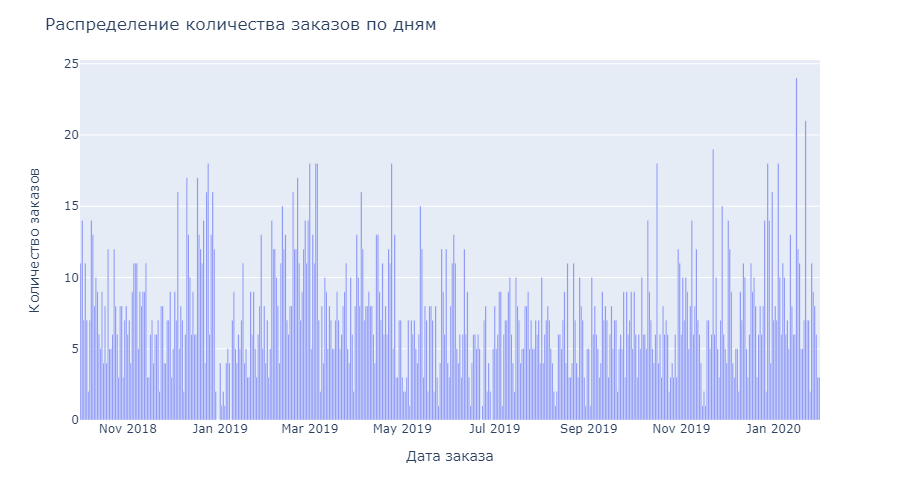

In [16]:
# Сформируем сводную таблицу с количеством заказов по каждому дню
counts_of_orders_day = data.pivot_table(index='date', values='order_id', aggfunc=['nunique'])\
                           .droplevel(level=1, axis=1)

# Создадим интерактивный график распределения количества заказов по дням, использую библиотеку "plotly"
fig = px.bar(counts_of_orders_day)

fig.update_layout(title='Распределение количества заказов по дням',
                  xaxis_title='Дата заказа',
                  yaxis_title='Количество заказов',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Наибольшее количество заказов было совершено 16 января 2020 года – 24. В целом, большинство заказов варьируется в пределах 5-15 единиц в день.

Проанализируем количество совершенных заказов по месяцам.

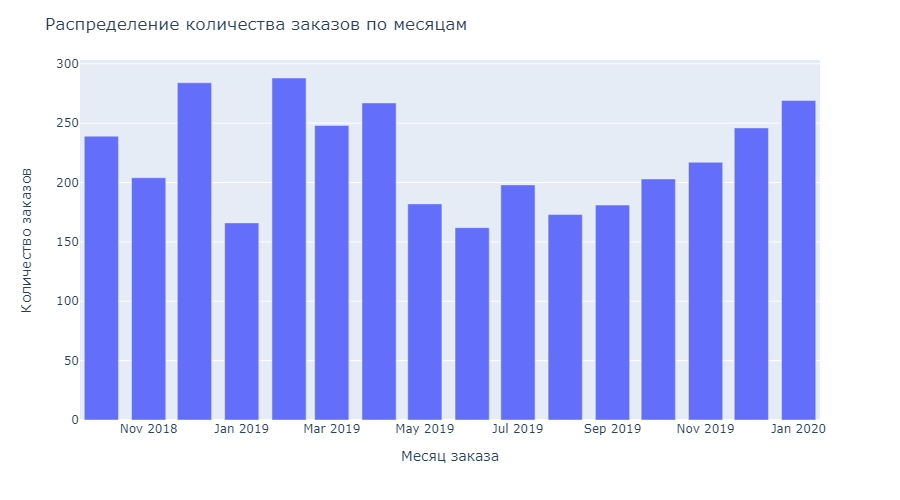

In [17]:
# Сформируем сводную таблицу с количеством заказов по каждому дню
counts_of_orders_month = data.pivot_table(index='year_month', values='order_id', aggfunc=['nunique'])\
                             .droplevel(level=1, axis=1)

fig = px.bar(counts_of_orders_month)

fig.update_layout(title='Распределение количества заказов по месяцам',
                  xaxis_title='Месяц заказа',
                  yaxis_title='Количество заказов',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Наибольшее количество заказов пользователи совершили в декабре 2018 и в феврале 2019 года – 284 и 288 заказов соответственно.

Отмечается снижение количества заказов с мая по сентябрь 2019 года, что может говорить о слабой активности пользователей в летний период.

### Анализ суммы заказов по дням и месяцам

Проанализируем стоимость совершенных заказов по дням.

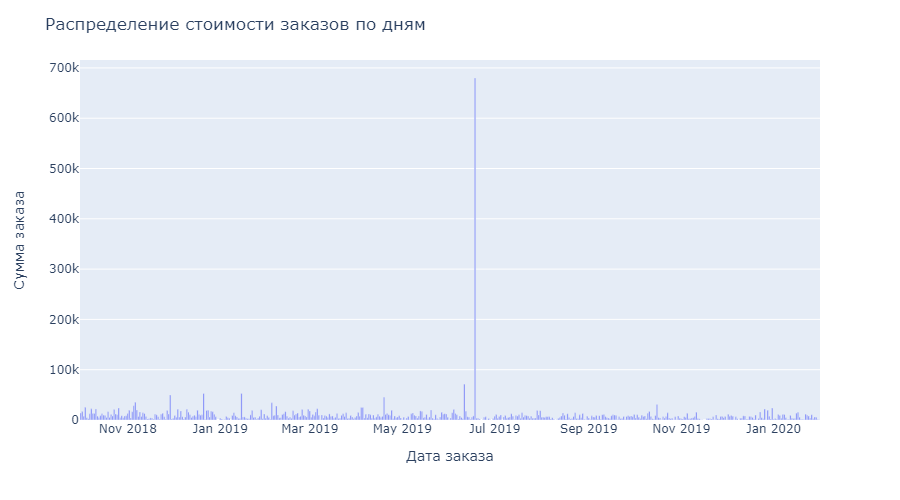

In [18]:
# Сформируем сводную таблицу с суммой заказов по каждому дню
daily_revenue = data.pivot_table(index='date', values='price_all_goods', aggfunc=['sum'])\
                    .droplevel(level=1, axis=1)

# Создадим интерактивный график распределения суммы заказов по дням, использую библиотеку "plotly"
fig = px.bar(daily_revenue)

fig.update_layout(title='Распределение стоимости заказов по дням',
                  xaxis_title='Дата заказа',
                  yaxis_title='Сумма заказа',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Наблюдается аномально большой заказ 18 июня 2019 года на сумму более 677 000 рублей.

Посмотрим на заказ подробнее.

In [19]:
data.query('date == "2019-06-18"')

,date,customer_id,order_id,product,quantity,price,price_all_goods,year_month
3813,2019-06-18,997658b1-66c1-4858-a852-50b2d33f2eaf,71732,"Таз пластмассовый 24,0 л пищевой круглый (Иж),...",1,239.0,239.0,2019-06-01
3814,2019-06-18,11394ce3-31bd-4d86-a9d6-4f7661cd96eb,71733,"Сумка-тележка TWIN стальной каркас 56 л синяя,...",1,2549.0,2549.0,2019-06-01
3815,2019-06-18,b3a1c618-6267-4a54-81c4-a1bd2d35d00b,71736,Пеларгония розебудная Prins Nikolai укорененны...,2,134.0,268.0,2019-06-01
3816,2019-06-18,705b09dc-2a15-4081-9fb2-58db9e3ebb4d,71738,"Таз пластмассовый 24,0 л пищевой круглый (Иж),...",1,239.0,239.0,2019-06-01
3817,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,675000.0,2019-06-01
3818,2019-06-18,3cfed4c4-1f28-49a0-8502-a6bc7a091cc2,71744,Гладильная доска НИКА 9 122х40 см Н9,1,1649.0,1649.0,2019-06-01


Заказ на 1000 вантузов стоит убрать из анализируемого датасета ввиду его крайне большой стоимости, практически десятикратно превышающей второй самый крупный заказ.

In [20]:
data.drop(index=data[data['quantity'] >= 1000].index, inplace=True)
data = data.reset_index(drop=True)

data.query('date == "2019-06-18"')

,date,customer_id,order_id,product,quantity,price,price_all_goods,year_month
3813,2019-06-18,997658b1-66c1-4858-a852-50b2d33f2eaf,71732,"Таз пластмассовый 24,0 л пищевой круглый (Иж),...",1,239.0,239.0,2019-06-01
3814,2019-06-18,11394ce3-31bd-4d86-a9d6-4f7661cd96eb,71733,"Сумка-тележка TWIN стальной каркас 56 л синяя,...",1,2549.0,2549.0,2019-06-01
3815,2019-06-18,b3a1c618-6267-4a54-81c4-a1bd2d35d00b,71736,Пеларгония розебудная Prins Nikolai укорененны...,2,134.0,268.0,2019-06-01
3816,2019-06-18,705b09dc-2a15-4081-9fb2-58db9e3ebb4d,71738,"Таз пластмассовый 24,0 л пищевой круглый (Иж),...",1,239.0,239.0,2019-06-01
3817,2019-06-18,3cfed4c4-1f28-49a0-8502-a6bc7a091cc2,71744,Гладильная доска НИКА 9 122х40 см Н9,1,1649.0,1649.0,2019-06-01


Вновь визуализируем распределение стоимости заказов по дням без учета аномального заказа.

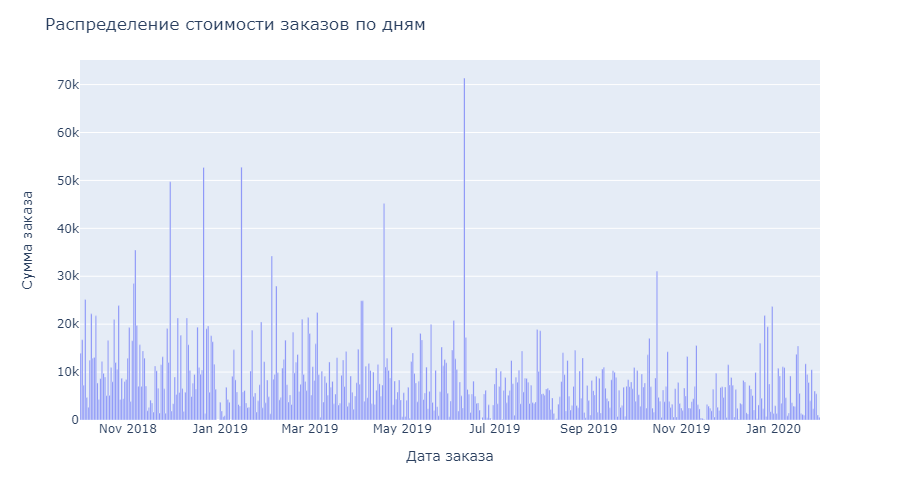

In [21]:
# Вновь сформируем сводную таблицу с суммой заказов по каждому дню
daily_revenue = data.pivot_table(index='date', values='price_all_goods', aggfunc=['sum'])\
                    .droplevel(level=1, axis=1)

# Создадим интерактивный график распределения суммы заказов по дням
fig = px.bar(daily_revenue)

fig.update_layout(title='Распределение стоимости заказов по дням',
                  xaxis_title='Дата заказа',
                  yaxis_title='Сумма заказа',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Самый дорогой заказ на сумму более 71 000 рублей зафиксирован 11 июня 2019 года. В целом, отмечается снижение суммы заказов во второй половине 2019-го года.

Проанализируем стоимость совершенных заказов по месяцам.

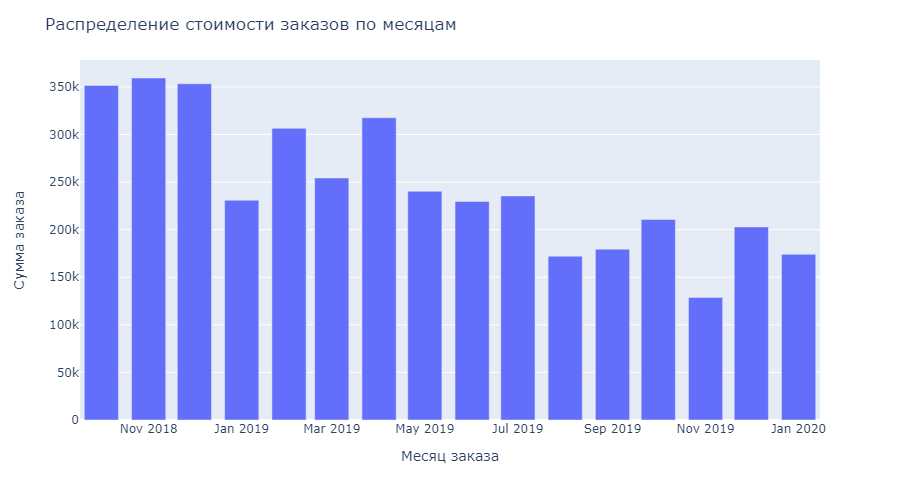

In [22]:
# Сформируем сводную таблицу с суммой заказов по каждому месяцу
monthly_revenue = data.pivot_table(index='year_month', values='price_all_goods', aggfunc=['sum'])\
                      .droplevel(level=1, axis=1)

# Создадим интерактивный график распределения суммы заказов по месяцам
fig = px.bar(monthly_revenue)

fig.update_layout(title='Распределение стоимости заказов по месяцам',
                  xaxis_title='Месяц заказа',
                  yaxis_title='Сумма заказа',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Отмечается постепенное снижение общей стоимости заказов от месяца к месяцу. Если в октябре 2018 года общая стоимость заказов составляла более 323 000 рублей, то к январю 2020 выручка снижается до 174 000 рублей.

Проанализируем как изменялась средняя стоимость заказа по месяцам.

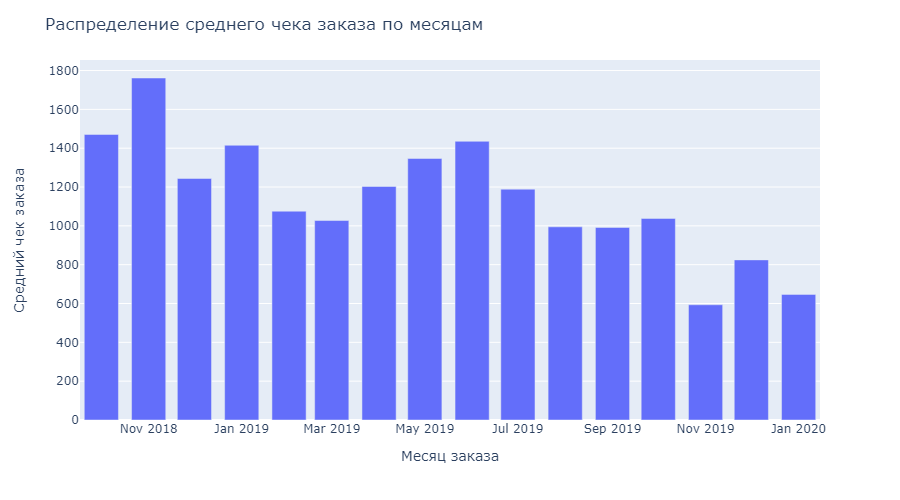

In [23]:
# Сгруппируем таблицу по заказам и рассчитаем сумму каждого из них
average_order_value = data.groupby(['order_id'])\
                          .agg({'price_all_goods': 'sum'})

# Переименуем столбец и сбросим индексы
average_order_value.columns = ['sum_of_orders']
average_order_value.reset_index(inplace=True)

# Присоединим столбец с датой
average_order_value = average_order_value.merge(data[['order_id', 'year_month']], how='left', on='order_id')
average_order_value = average_order_value.drop_duplicates()

# Сгруппируем таблицу по средней стоимости заказа в каждый месяц
average_order_value = average_order_value.pivot_table(index='year_month', values='sum_of_orders', aggfunc=['mean'])\
                                         .droplevel(level=1, axis=1)

# Создадим интерактивный график распределения средней стоимости заказа по месяцам
fig = px.bar(average_order_value)

fig.update_layout(title='Распределение среднего чека заказа по месяцам',
                  xaxis_title='Месяц заказа',
                  yaxis_title='Средний чек заказа',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Динамика среднего чека схожа с динамикой общей стоимости заказов. Значение среднего чека заказа постепенно уменьшается с октября 2018 по январь 2020 года с 1 471 до 647 рублей.

### Анализ уникальных пользователей

Сгруппируем таблицу по пользователям и проанализируем как часто покупатели совершают повторные покупки.

In [24]:
# Сгруппируем пользователей по количеству совершенных ими уникальных заказов
unique_customers = data.pivot_table(index='customer_id', values='order_id', aggfunc=['nunique'])\
                       .droplevel(level=1, axis=1)\
                       .sort_values(by='nunique', ascending=False)

# Сбросим индексы и зададим корректное название столбцу с количеством заказов
unique_customers = unique_customers.reset_index()
unique_customers = unique_customers.rename(columns={'nunique': 'counts_unique_orders'})

unique_customers

,customer_id,counts_unique_orders
0,c971fb21-d54c-4134-938f-16b62ee86d3b,126
1,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
2,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
3,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
4,0184f535-b60a-4914-a982-231e3f615206,5
...,...,...
2424,69c524f1-dd2a-4c4e-a5b0-def54dc96f9e,1
2425,69b17a52-a59b-4656-8d47-375e81e7d5f1,1
2426,69897438-1f6c-42f3-8876-ec7f0296072d,1
2427,6987e6d6-a63a-4ce2-a2d0-f424092d235e,1


С октября 2018 по январь 2020 года покупки в интернет-магазине совершили 2 429 уникальных пользователя.

Большинство покупателей совершили не более 5 покупок в интернет-магазине, однако в датасете присутствует пользователь, совершивший крайне большое количество заказов – 126. Такое большое количество заказов может говорить об оптовых закупках, что явно выбивается из общей массы покупателей в связи с чем информацию о заказах данного пользователя стоит убрать из датасета.

In [25]:
data = data.drop(data[data['customer_id'] == 'c971fb21-d54c-4134-938f-16b62ee86d3b'].index)
data = data.reset_index(drop=True)

### Анализ количества совершенных покупок

Сгруппируем пользователей по количеству совершенных ими заказов и проанализируем данные на круговой диаграмме. 

In [26]:
# Вновь сгруппируем пользователей по количеству совершенных ими уникальных заказов
# но уже на основе скорректированного датасета
unique_customers = data.pivot_table(index='customer_id', values='order_id', aggfunc=['nunique'])\
                       .droplevel(level=1, axis=1)\
                       .sort_values(by='nunique', ascending=False)

unique_customers = unique_customers.reset_index()
unique_customers = unique_customers.rename(columns={'nunique': 'counts_unique_orders'})

# Сгруппируем количество уникальных заказов по количеству совершивших их пользователей
unique_customers = unique_customers.groupby('counts_unique_orders').agg('count')\
                        .rename(columns={'customer_id': 'counts_customers'})

# Рассчитаем долю таких покупателей и сбросим индексы
unique_customers['share, %'] = round(unique_customers['counts_customers'] / unique_customers['counts_customers'].sum() * 100, 2)
unique_customers = unique_customers.reset_index()

unique_customers

,counts_unique_orders,counts_customers,"share, %"
0,1,1544,63.59
1,2,857,35.30
2,3,20,0.82
3,4,3,0.12
4,5,1,0.04
5,7,1,0.04
6,17,1,0.04
7,35,1,0.04


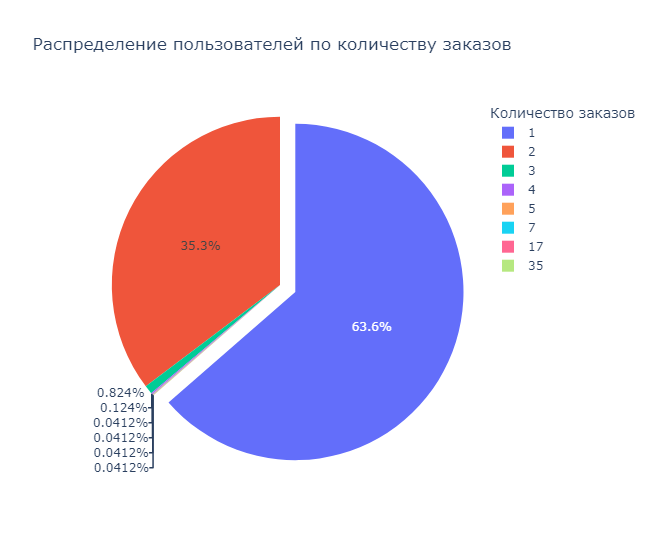

In [27]:
# Построим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=unique_customers['counts_unique_orders'], 
                                    values=unique_customers['counts_customers'],
                                    pull = [0.1, 0])]
               )

fig.update_layout(title='Распределение пользователей по количеству заказов', 
                  legend_title='Количество заказов',
                  width=650, 
                  height=550,
                  )
static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Большинство пользователей совершает 1 заказ и не возвращается на платформу – 63 %. Чуть больше трети покупателей совершают 2 заказа. Суммарная доля пользователей, совершивших три и более заказов чуть более 1 %.

## Анализ пользователей по категориям товаров

### Формирование категорий товаров

В исходном датасете отсутствует информация о категориях товаров.

Используя столбец `product`, содержащий название товара, сформируем новый столбец с категориями товаров.

Создадим столбец `products_two_words` в который поместим первые два слова названия товара.

In [28]:
data['products_two_words'] = data['product'].str.split().str[:2].str.join(' ')

data.head(3)

,date,customer_id,order_id,product,quantity,price,price_all_goods,year_month,products_two_words
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,Комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,Комнатное растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,Радермахера d-12


Выведем все уникальные названия сформированного столбца `products_two_words` и отсортируем их в алфавитном порядке.

In [29]:
data['products_two_words'].sort_values().unique()

array(['Tepмокружка AVEX', 'Ёрш бутылочный', 'Ёрш для', 'Ёрш радиаторный',
       'Ёрш унитазный', 'Автоматическая щетка', 'Агератум рассада',
       'Адиантум Лиза', 'Азалия Индика', 'Азалия индика',
       'Аквилегия махровая', 'Аквилегия обыкновенная',
       'Алиссум (лобулярия)', 'Алиссум Скальный', 'Алиссум рассада',
       'Алоэ Вера', 'Альбука Спиралис', 'Амариллис Red', 'Анемона белый',
       'Антижир POSH', 'Антинакипин для', 'Антуриум Андрианум',
       'Антуриум Тропик', 'Антуриум андрианум', 'Аптения d-10',
       'Аптения d-12', 'Арбуз Волгоградец', 'Арбуз Огонек',
       'Арбуз Сибирские', 'Арбуз Холодок', 'Арбуз Шуга',
       'Аргирантерум рассада', 'Ароматизированное средство',
       'Артемизия (Полынь', 'Аспарагус d-12', 'Аспарагус Спренжери',
       'Астра альпийская', 'Астра рассада', 'Афеляндра скуарроса',
       'Бадан Сердцелистный', 'Базилик Застольный', 'Базилик Овощной',
       'Базилик Пурпурные', 'Базилик Смесь', 'Базилик зеленый',
       'Базилик овощной'

На основании уникальных пар слов столбца `products_two_words` создадим словарь с категориями товаров и функцию,  которая будет возвращать соответствующую категорию для каждого продукта в новый столбец `category`.

In [30]:
# Создаем словарь категорий с ключевыми словами
categories_dict = {
    'Строительство и ремонт': ['Ванна 70', 'Завертка форточная', 'Измерительный алюминиевый', 'Измерительный угольник,',\
                               'Карниз алюминиевый', 'Карниз для', 'Крепеж для', 'Крючок одежный', 'Крючок проволочный',\
                               'Лестница стремянка', 'Лестница-стремянка Dogrular', 'Лестница-стремянка Sarayli',\
                               'Набор инструментов', 'Набор прецизионных', 'Набор сверел', 'Насадка на', 'Основание для',\
                               'Паста для', 'Петля приварная', 'Петля-стрела ПС-286', 'Пружина дверная',\
                               'Решетка вентиляционная', 'Ручка мебельная', 'Ручка-скоба РС-100', 'Сверло по',\
                               'Сверло-фреза, 6', 'Сверло-фреза, 8', 'Стремянка 5', 'Стремянка 7', 'Стремянка COLOMBO',\
                               'Стремянка Colombo', 'Стремянка DOGRULAR', 'Стремянка Eurogold', 'Стремянка FRAMAR',\
                               'Стремянка Framar', 'Стремянка Scab', 'Стремянка алюминиевая', 'Стремянка бытовая',\
                               'Стремянка металлическая', 'Стремянка-табурет алюминиевая', 'Стремянки Colombo',\
                               'Стяжка оконная', 'Уголок оконный', 'Фал капроновый', 'Фиксатор-шар хром', 'Холодная сварка',\
                               'Шпингалет 80', 'Штанга для', 'Штангенциркуль 150', 'Ящик почтовый'],
    
    'Декор': ['Ваза МАСКАРАД', 'Декоративная композиция', 'Декоративная коробка', 'Искусственная композиция',\
              'Искусственная лиана', 'Искусственный лист', 'Искусственный цветок', 'Муляж "Райские', 'Муляж Ананас',\
              'Муляж Апельсин', 'Муляж Баклажан', 'Муляж Банан', 'Муляж Банан,', 'Муляж Булка', 'Муляж Виноград',\
              'Муляж Виноград,', 'Муляж Вишня', 'Муляж Вишня,', 'Муляж ГРАНАТ', 'Муляж Гранат', 'Муляж Груша',\
              'Муляж Груша,', 'Муляж Долька', 'Муляж Желудь', 'Муляж Зеленое', 'Муляж Клубника', 'Муляж Красное',\
              'Муляж Лайм', 'Муляж Лимон', 'Муляж Лимон,', 'Муляж Манго', 'Муляж Мандарин', 'Муляж Мандарин,',\
              'Муляж Морковь', 'Муляж Оранжевое', 'Муляж Перец', 'Муляж Перец,', 'Муляж Персик', 'Муляж Персик,',\
              'Муляж Персики', 'Муляж Томат', 'Муляж Томат,', 'Муляж Тыквы', 'Муляж Хлеб', 'Муляж ЧЕРЕШНЯ', 'Муляж Черешня',\
              'Муляж Чеснок', 'Муляж ЯБЛОКО', 'Муляж Яблоко', 'Муляж Яблоко', 'Новогоднее дерево', 'Подвесное кашпо',\
              'Цветок искусственный'],
    
    'Бытовая химия': ['Бальзам для', 'Бензин для', 'Ароматизированное средство', 'Гипоаллергенный концентрированный',\
                      'Защитная соль', 'Кондиционер для', 'Концентрат для', 'Ополаскиватель для', 'Отбеливатель Пероксоль',\
                      'Средство для', 'Средство против', 'Стиральный биопорошок', 'Универсальное средство', 'Чистящий крем'],
    
    'Гигиена': ['Зубная паста', 'Жидкое мыло', 'Мыло жидкое', 'Мыло ручной', 'Мыло-скраб с', 'Паста зубная', 'Пена для',\
                'Увлажняющая маска'],
    
    'Товары для дома': ['Вешалка -', 'Вешалка Valiant', 'Вешалка НИКА', 'Вешалка гардеробная',\
                        'Вешалка деревянная', 'Вешалка для', 'Вешалка металлическая', 'Вешалка надверная',\
                        'Вешалка напольная', 'Вешалка настенная', 'Вешалка с', 'Вешалка самоклеющая',\
                        'Вешалка-перекладина Valiant', 'Вешалка-плечики 3','Вешалка-плечики без', 'Вешалка-стойка Сакура',\
                        'Вешалка-стойка №', 'Вешалка-сушилка Gimi', 'Вешалки мягкие', 'Гладильная доска',\
                        'Гладильная доска-стремянка', 'Двуспальное постельное', 'Держатель для', 'Дозатор для',\
                        'Доска гладильная', 'Ключница Картина', 'Кухонное полотенце', 'Комплект махровых',\
                        'Комплект постельного', 'Ковер придверный', 'Коврик Bacchetta', 'Коврик Dasch', 'Коврик Sochi',\
                        'Коврик в', 'Коврик влаговпитывающий', 'Коврик ворсовый', 'Коврик для', 'Коврик интерьерный',\
                        'Коврик кухонный', 'Коврик придверный', 'Коврик придверный,', 'Коврик противоскользящий',\
                        'Коврик резиновый', 'Коврик хлопковый', 'Ковёр придверный', 'Кольца для', 'Комод Эльфпласт',\
                        'Комплект для', 'Корзина CITY', 'Корзина для', 'Корзина мягкая', 'Корзина на', 'Корзина пластиковая',\
                        'Корзинка с', 'Короб стеллажный', 'Коробка INFINITY', 'Коробка для', 'Коробка прямоугольная',\
                        'Корыто оцинкованное', 'Кофр для', 'Кофр малый', 'Линейка, длина', 'Ложка обувная', 'Лоток KNIT',\
                        'Махровое полотенце', 'Махровый халат', 'Мусорный контейнер', 'Набор вешалок', 'Набор ковров',\
                        'Набор кухонных', 'Набор махровых', 'Наволочка Wellness', 'Наматрасник Wellness',\
                        'Наматрацник Natures', 'Наматрицник-чехол Natures', 'Настенная сушилка', 'Настольная гладильная',\
                        'Обувница-3 Квадро', 'Одеяло Wellness', 'Плед флисовый', 'Плечики пластмассовые',\
                        'Подголовник Bacchetta', 'Подголовник для', 'Пододеяльник 214х150', 'Подрукавник Gimi',\
                        'Подрукавник Leifheit', 'Подрукавник складной', 'Подставка для', 'Подушка 40х40',\
                        'Подушка декоративная', 'Покрывало KARNA', 'Покрывало жаккард', 'Покрывало стеганый', 'Покрытие для',\
                        'Полка для', 'Полки QWERTY', 'Полотенце кухонное', 'Полотенце махровое', 'Полотенце прессованное',\
                        'Пробка для', 'Простынь вафельная', 'Простыня двуспальная', 'Простыня на', 'Простыня сатиновая',
                        'Пьезозажигалка с', 'Рассекатель пламени', 'Рукав для', 'Салфетка Protec', 'Салфетка Камушки',\
                        'Салфетка махровая', 'Салфетка на', 'Салфетница металлическая', 'Сервировочная салфетка', 'Сетка для',\
                        'Сиденье в', 'Сиденье для', 'Скатерть 150х120', 'Скатерть 180', 'Скатерть 350х150',\
                        'Скатерть 350х180', 'Скатерть Dasch', 'Скатерть Towa', 'Скатерть Ажурная', 'Скатерть Азалия',\
                        'Скатерть Арлет', 'Скатерть Беатрис', 'Скатерть Джулия', 'Скатерть Династия', 'Скатерть Жаклин',\
                        'Скатерть Лувр', 'Скатерть Муза', 'Скатерть Рим', 'Скатерть Сидней', 'Скатерть виниловая',\
                        'Скатерть из', 'Скатерть круглая', 'Скатерть прямоугольная', 'Складная картонная',\
                        'Складной детский', 'Стакан для', 'Стеллаж для', 'Стяжки для', 'Сумка для', 'Сумка хозяйственная',\
                        'Сумка-тележка 2-х', 'Сумка-тележка 3-х', 'Сумка-тележка Brava', 'Сумка-тележка DELTA',\
                        'Сумка-тележка GIMI', 'Сумка-тележка TWIN', 'Сумка-тележка хозяйственная', 'Сушилка Meliconi',\
                        'Сушилка для', 'Сушилка уличная', 'Термометр на', 'Термометр уличный', 'Фоторамка Alparaisa',\
                        'Халат вафельный', 'Чехол Eurogold', 'Чехол для', 'Этажерка цветочная', 'Этажерка для',\
                        'Этажерка цветочная', 'Ящик для', 'Этажерка 2'],
    
    'Хозяйственные товары': ['Ёрш бутылочный', 'Ёрш для', 'Ёрш радиаторный', 'Ёрш унитазный', 'Автоматическая щетка',\
                             'Бак для', 'Бельевые прищепки', 'Бидон пластмассовый', 'Вакуумный пакет', 'Вантуз черный',\
                             'Ведро AMPARI', 'Ведро Полимербыт', 'Ведро без', 'Ведро для', 'Ведро овальное',\
                             'Ведро пластиковое', 'Ведро резинопластиковое', 'Веник для', 'Веник сорго',\
                             'Веревка полипропиленовая', 'Губка спираль', 'Ерш для', 'Запасная насадка', 'Мешок для',\
                             'Мыльница пластмассовая', 'Набор Vileda', 'Набор прищепок',  'Насадка для', 'Насадка к',\
                             'Насадка-моп ROZENBAL', 'Насадка-отжим пластиковая', 'Нетканые салфетки', 'Окномойка с',\
                             'Отжим для', 'Перчатки Extra', 'Перчатки Fabrikators', 'Перчатки Latex', 'Перчатки латексные',\
                             'Перчатки резиновые', 'Подкладка под', 'Прищепки для', 'Ролик для', 'Скребок 44',\
                             'Скребок для', 'Сменная насадка', 'Сменный блок', 'Сметка с', 'Совок для', 'Совок и',\
                             'Совок металический', 'Таз алюминиевый,', 'Таз пластмассовый',  'Тележка багажная',\
                             'Тележка хозяйственная',  'Ткань для', 'Ткань универсальная', 'Тряпка для', 'Тряпкодержатель с',\
                             'Урна уличная', 'Урна-пепельница из', 'Швабра Leifheit', 'Швабра САЛЬСА', 'Швабра для',\
                             'Швабра многофункциональная', 'Швабра многофункциональная,', 'Швабра хозяйственная',\
                             'Шнур резиновый', 'Шило с', 'Шнур хозяйственный', 'Шпагат полипропиленовый', 'Штора для',\
                             'Штора со', 'Штора текстильная', 'Щетка для', 'Щетка универсальная', 'Щетка хозяйственная',\
                             'Щетка-сметка 3-х', 'Щетка-сметка 4-х', 'Щетка-сметка с', 'Щетка-утюжок с', 'Щётка для'],
    
    'Растения': ['Агератум рассада', 'Адиантум Лиза', 'Азалия Индика', 'Азалия индика', 'Аквилегия махровая',\
                 'Аквилегия обыкновенная', 'Алиссум (лобулярия)', 'Алиссум Скальный', 'Алиссум рассада', \
                 'Алоэ Вера', 'Альбука Спиралис', 'Амариллис Red', 'Анемона белый', 'Антижир POSH', \
                 'Антинакипин для', 'Антуриум Андрианум', 'Антуриум Тропик', 'Антуриум андрианум', 'Аптения d-10',\
                 'Аптения d-12', 'Арбуз Волгоградец', 'Арбуз Огонек', 'Арбуз Сибирские', 'Арбуз Холодок', 'Арбуз Шуга',\
                 'Аргирантерум рассада', 'Артемизия (Полынь', 'Аспарагус d-12', 'Аспарагус Спренжери', 'Астра альпийская',\
                 'Астра рассада', 'Афеляндра скуарроса','Бадан Сердцелистный', 'Базилик Застольный', 'Базилик Овощной',\
                 'Базилик Пурпурные', 'Базилик Смесь', 'Базилик зеленый', 'Базилик овощной', 'Баклажан Самурай',\
                 'Бакопа ампельная', 'Бакопа ампельная', 'Бальзамин Валера', 'Бальзамин новогвинейский', 'Барвинок синий',\
                 'Бархатцы Веселая', 'Бегония Элатиор', 'Бегония ампельная', 'Бегония вечноцветущая', 'Бегония клубневая',\
                 'Буддлея Вейера', 'Бузульник Пржевальского', 'Валериана лекарственная', 'Вербейник монетчатый',\
                 'Вербена Fuhcsia', 'Вербена Red', 'Вербена White', 'Вербена ампельная,', 'Вербена крупноцветковая',\
                 'Вербена микс', 'Вербена рассада', 'Вероника колосковая',  'Вигна Лилиана', 'Виола рассада', 'Виола рогатая',\
                 'Газания рассада', 'Гайлардия крупноцветковая', 'Гардения d-9', 'Гвоздика Травянка', 'Гвоздика садовая',\
                 'Гвоздика стандартная', 'Гвоздика турецкая', 'Георгина Черная', 'Герань домашняя', 'Гербера d-13',\
                 'Гербера комнатная', 'Гиацинт Blue', 'Гимнокалициум Микс', 'Гиностемма укорененный', 'Гипсофила Аврора',\
                 'Глоксиния d-13', 'Годеция Рембранд', 'Горох Амброзия', 'Гортензия Микс', 'Гортензия метельчатая',\
                 'Девичий виноград', 'Декабрист в', 'Дендробиум Санок', 'Дендробиум Яблоневый', 'Джункус Пенсил',\
                 'Диффенбахия d-12', 'Диффенбахия Камилла', 'Драцена фрагранс', 'Душица обыкновенная', 'Дыня Алтайская',\
                 'Дыня Дина', 'Дыня Золотой', 'Дыня Колхозница', 'Дыня Медовый', 'Дыня Млада', 'Дыня Награда',\
                 'Дыня Симпатия', 'Ель канадская', 'Замиокулькас d-15', 'Зверобой продырявленный', 'Земляника Барон',\
                 'Земляника садовая', 'Змееголовник молдавский', 'Импатиенс Нью', 'Иссоп лекарственный', 'Кабачок Изумруд',\
                 'Каланхое каландива', 'Калатея Кроката', 'Калатея Микс', 'Календула Бронзовая', 'Календула Пинк',\
                 'Календула Суприм', 'Калибрахоа Aloha', 'Калибрахоа Bloomtastic', 'Калибрахоа Mini', 'Калибрахоа Rave',\
                 'Калибрахоа Sweet', 'Калибрахоа ампельная,', 'Калла крупноцветковая', 'Каллуна Гарден', 'Калоцефалус Брауни',\
                 'Камнеломка Арендса', 'Камнеломка тенистая', 'Кампанула махровая', 'Капсикум Сальса', 'Капуста белокочанная',\
                 'Капуста брокколи', 'Капуста брюссельская', 'Капуста декоративная', 'Капуста кольраби', 'Капуста цветная',\
                 'Кипарисовик лавсона', 'Клен ложноплатановый', 'Клубника Альба', 'Клубника Мара', 'Клубника Хоней',\
                 'Кодонанта укорененный', 'Колеус рассада', 'Колокольчик Карпатский', 'Колокольчик персиколистный',\
                 'Комнатное растение', 'Кореопсис Золотой', 'Кореопсис Толл', 'Кориандр Стимул', 'Кориандр в',\
                 'Космея Клюквенный', 'Космея Кэнди', 'Космея Лимонад', 'Космея Очаровашка', 'Космея Попсокс',\
                 'Космея Снежный', 'Котовник Блю', 'Кофе Арабика', 'Крассула d-17', 'Крассула овата', 'Крокусы Pickwick',\
                 'Лаванда d-9', 'Лаванда Торх', 'Лаванда в', 'Лаватера Монт', 'Лавр d-9', 'Лавр в', 'Лавр нобилис',\
                 'Лантана d-13', 'Лантана в', 'Лапчатка Огненное', 'Лапчатка травянистая', 'Левкой рассада', 'Лен Небесная',\
                 'Лилейник высокорослый', 'Литопс Микс', 'Лобелия Регатта', 'Лобелия ампельная,', 'Лобелия рассада',\
                 'Лук порей', 'Львиный зев', 'Любисток Удалец', 'Маттиола Ночная', 'Мединилла Магнифика',\
                 'Мелисса лекарственная', 'Мимоза стыдливая', 'Мирт d-20', 'Мирт d-9',  'Многолетнее растение',\
                 'Молодило Микс', 'Молодило в', 'Монарда в', 'Монарда гибридная', 'Морковь Детская', 'Муррайя d-9',\
                 'Мускари White', 'Мята Aura', 'Мята d-9', 'Мята Махито', 'Мята колосистая', 'Мята перечная',\
                 'Настурция Драгоценность', 'Настурция Лунный', 'Настурция Орхидное', 'Незабудка смесь',\
                 'Нефролепис Бостон', 'Нивянник (Ромашка)', 'Нолина в', 'Овсянница сизая', 'Огурец Алтай',\
                 'Огурец Аристократ', 'Огурец Багратион', 'Огурец Боярский', 'Огурец Закусочный', 'Огурец Засолочный',\
                 'Однолетнее растение', 'Осина обыкновенная,', 'Папоротник страусник', 'Патиссон Диск', 'Патиссон Зонтик',\
                 'Патиссон НЛО', 'Пахира Акватика', 'Пеларгония Angeleyes', 'Пеларгония Toscana', 'Пеларгония d-13',\
                 'Пеларгония Грандифлора', 'Пеларгония душистая', 'Пеларгония зональная', 'Пеларгония плющелистная',\
                 'Пеларгония розебудная', 'Пеларгония розоцветная', 'Пеларгония тюльпановидная', 'Пеперомия d-12',\
                 'Петрушка Итальянский', 'Петрушка корневая', 'Петрушка листовая', 'Петуния Baby', 'Петуния Bordeaux',\
                 'Петуния Crazytunia', 'Петуния Orange', 'Петуния Pegasus', 'Петуния Potunia', 'Петуния Sanguna',\
                 'Петуния Sky', 'Петуния Surfinia', 'Петуния Surprice', 'Петуния Surprise', 'Петуния Sweetunia',\
                 'Петуния Каскад', 'Петуния Свитуния', 'Петуния ампельная', 'Петуния гибридная', 'Петуния изи',\
                 'Петуния крупноцветковая', 'Петуния махровая', 'Петуния простая', 'Петуния рассада', 'Пиретрум Робинсон',\
                 'Платикодон махровый', 'Подарочный набор', 'Подсолнечник низкорослый', 'Портулак рассада',\
                 'Примула акаулис', 'Примула желтая', 'Примула комнатная', 'Примула рассада', 'Пряные травы',\
                 'Пуансетия d-12', 'Пуансеттия d-12', 'Пуансеттия d-15', 'Пуансеттия d-23', 'Пуансеттия в',\
                 'Радермахера d-12', 'Ранункулус Клуни', 'Рассада Арбуза', 'Рассада Дыни', 'Рассада Кабачка',\
                 'Рассада Кабачок', 'Рассада Капусты', 'Рассада Огурец', 'Рассада Огурца', 'Рассада Остеоспермум',\
                 'Рассада Патиссона', 'Рассада Пеларгония', 'Рассада Тыквы', 'Рассада в', 'Рассада зелени',\
                 'Рассада клубники', 'Рассада перца', 'Рассада пряной', 'Рассада томата', 'Роза Кордана', 'Роза Палас',\
                 'Роза Патио', 'Роза кордана', 'Роза кустовая', 'Роза мини', 'Роза одноголовая', 'Роза патио',\
                 'Роза садовая', 'Роза чайно-гибридная', 'Розмарин d-12', 'Розмарин d-9', 'Розмарин в', 'Рудбекия Тайгер',\
                 'Салат Рукола','Сальвия рассада', 'Сантолина d-9', 'Седум (очиток)', 'Седум почвопокровный',\
                 'Сельдерей листовой', 'Синнингия (глоксиния)', 'Смолевка Звездный', 'Соланум d-10', 'Солидаго желтый',\
                 'Спатифиллум d-7', 'Спатифиллум Свит', 'Спатифиллум Шопен', 'Суккулент Микс', 'Сциндапсус в',\
                 'Табак бордовый', 'Табак душистый', 'Табак курительный', 'Тагетис крупноцветковый', 'Тимьян d-9',\
                 'Тимьян в', 'Тимьян крымский', 'Тимьян овощной', 'Томат Балконное', 'Томат Государь',\
                 'Томат детерминантный', 'Тыква крупноплодная', 'Тюльпан Louvre', 'Укроп Обильнолистный', 'Фаленопсис Люкс',\
                 'Фаленопсис желтый', 'Фаленопсис королевский', 'Фатсия d-17', 'Фатсия японская', 'Фиалка d-11', 'Фиалка d-9',\
                 'Фиалка Карнавал', 'Фиалка Химера', 'Фиалка махровая', 'Физостегия Вергинская', 'Фикус каучуконосный',\
                 'Фиттония Скелетон', 'Флокс Растопыренный', 'Флокс друммонда', 'Флокс метельчатый', 'Фуксия Bella',\
                 'Фуксия Blue', 'Фуксия Dark', 'Фуксия E4', 'Фуксия Swingtime', 'Фуксия ампельная', 'Фуксия ампельная,',\
                 'Фуксия прямостоячая', 'Хамедорея d-12', 'Хлорофитум d-13', 'Хлорофитум d-7', 'Хоста микс',\
                 'Хризантема Белая', 'Хризантема Корейская', 'Хризантема Космо', 'Хризантема Красная',\
                 'Хризантема кустовая', 'Хризантема сиреневая', 'Хризолидокарпус Лутесценс', 'Цветущее комнатное',\
                 'Целозия гребенчатая', 'Цикламен d-12', 'Цикламен d-13', 'Цикламен d-15', 'Цикламен комнатный',\
                 'Цикламен розовый', 'Цикламен, цвет', 'Цинерания рассада', 'Цинерария Серебряная', 'Цинерария серебряная',\
                 'Циния рассада', 'Цинния Ацтек', 'Цинния Коралловая', 'Цинния Оранжевый', 'Цинния хаага', 'Циперус Зумула',\
                 'Цитрофортунелла Кумкват', 'Чабер Bolero', 'Шалфей овощной', 'Шеффлера Голд', 'Шеффлера Лузеана',\
                 'Эвкалипт Гунни', 'Эвкалипт Сильвердроп', 'Энотера Миссурийская', 'Эпипремнум Ауреум', 'Эхеверия Лила',\
                 'Эхеверия Микс', 'Эхеверия Перл', 'Эхинацея микс', 'Эхинокактус Грузони', 'Эшшольция Карминный',\
                 'Юкка нитчатая', 'Ясколка Войлочная', 'томата (помидор)'],
    
    'Бытовая техника': ['Весы напольные', 'Весы настольные', 'Весы электронные', 'Кипятильник электрический', 'Миксер DELTA',\
                        'Миксер ВАСИЛИСА', 'Миксер электрический', 'Пылесос DELTA', 'Утюг DELTA', 'Утюг электрический',\
                        'Фен дорожный', 'Чайник электрический', 'Электроштопор QWERTY'],
    
    'Посуда': ['Банка с', 'Банка со', 'Банка РОНДО', 'Банка из', 'Банка стеклянная', 'Блюдо Pasabahce',\
               'Блюдце УТРО', 'Бульонница Luminarc', 'Венчик с', 'Вилка столовая', 'Вкладыши для', 'Доска разделочная',\
               'Емкость для', 'Жестяная банка', 'Защитный экран', 'Измельчитель овощей', 'Картофелемялка металлическая',\
               'Кастрюля алюминиевая', 'Кастрюля круглая', 'Кастрюля чугунная', 'Кастрюля эмалированная',\
               'Кастрюля эмалированная,', 'Кружка 350', 'Кружка Luminarc', 'Кружка БАМБУК', 'Кружка МАРЛИ', 'Кружка НОРДИК',\
               'Кружка О', 'Кружка ТАЧКИ', 'Кружка для', 'Кружка мерная', 'Кружка прозрачная', 'Кружка с',\
               'Крышка оцинкованная', 'Кувшин Luminarc', 'Кувшин пластмассовый', 'Кухонные ножницы', 'Ковш пластмассовый',\
               'Контейнер герметичный', 'Контейнер для', 'Котел алюминиевый', 'Ложка кухонная', 'Ложка столовая',\
               'Ложка чайная', 'Лопатка Attribute', 'Лопатка c', 'Лоток для', 'Мантоварка алюминиевая',\
               'Мантоварка-пароварка WEBBER', 'Масленка КОРОВКА', 'Мерный стакан', 'Мини-сковорода Marmiton',\
               'Миска Фазенда', 'Миска для', 'Модульная стеклянная', 'Набор бокалов', 'Набор для', 'Набор кружек',\
               'Набор ножей', 'Набор посуды', 'Набор стаканов', 'Набор столовых', 'Набор форм', 'Набор фужеров',\
               'Набор эмалированных', 'Нож для', 'Нож кухонный', 'Нож поварской', 'Нож столовый', 'Нож универсальный',\
               'Ножеточка универсальная', 'Овощеварка алюминиевая', 'Овощечистка с', 'Орехоколка VIVA,', 'Отделитель косточек',\
               'Половник Attribute', 'Пресс для', 'Просеиватель для', 'Противень прямоугольный', 'Разделочная доска',\
               'Рыбочистка металлическая,', 'Рыбочистка с', 'Салатник Luminarc', 'Салатник АМОРИ', 'Салатник АСПЕН',\
               'Салатник ВОЛАРЭ', 'Салатник КАРИН', 'Салатник КОЛОРАМА', 'Салатник РАПСОДИ', 'Салатник РОМАНТИК',\
               'Салатник ЭМПИЛАБЛЬ', 'Сахарница фарфоровая', 'Сито WEBBER', 'Скалка силиконовая,', 'Сковорода HARD',\
               'Сковорода Scovo', 'Сковорода алюминиевая', 'Соковарка WEBBER', 'Соковарка алюминиевая', 'Соковыжималка для',\
               'Сотейник алюминиевый', 'Стакан низкий', 'Стакан пластмассовый', 'Стеклянная крышка', 'Столовая ложка',\
               'Столовый нож', 'Тарелка десертная', 'Тарелка обеденная', 'Тарелка суповая', 'Терка WEBBER', 'Терка для',\
               'Термокружка Alpenkok', 'Термокружка Забава', 'Термокружка Яромир', 'Термокружка вакуумная', 'Термос 1л',\
               'Термос со', 'Термостакан WEBBER', 'Толкушка деревянная', 'Толкушка для', 'Тортница CURVER',\
               'Универсальный нож', 'Фарфоровая кружка', 'Форма АLPENKOK', 'Форма для', 'Хлебница Webber',\
               'Хлебница деревянная', 'Хлебница пластмасовая', 'Чайная ложка', 'Чайник заварочный', 'Чайник со',\
               'Чайник эмалированный', 'Чайный набор', 'Шприц кондитерский', 'Tepмокружка AVEX']
}

# Создаем функцию, которая будет возвращать категорию товара для каждой строки
def categorize_product(product_name):
    for category, keywords in categories_dict.items():
        for keyword in keywords:
            if keyword in product_name:
                return category
    return 'Другое'

# Добавляем столбец с категориями товаров
data['category'] = data['products_two_words'].apply(categorize_product)

data.tail()

,date,customer_id,order_id,product,quantity,price,price_all_goods,year_month,products_two_words,category
5426,2020-01-30,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,2020-01-01,томата (помидор),Растения
5427,2020-01-30,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01-01,Дендробиум Санок,Растения
5428,2020-01-31,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,2020-01-01,Подставка для,Товары для дома
5429,2020-01-31,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,2020-01-01,Тагетис крупноцветковый,Растения
5430,2020-01-31,2e460a26-35af-453d-a369-a036e95a40e0,103225,Вешалка для блузок 41 см красный Attribute AHM781,1,104.0,104.0,2020-01-01,Вешалка для,Товары для дома


Теперь для каждого названия товара подобрана одна из девяти соответствующих категорий.

### Анализ количества покупок по категориям товаров

Сгруппируем таблицу по категориям товаров и проанализируем в каких категориях пользователи чаще всего совершают покупки.

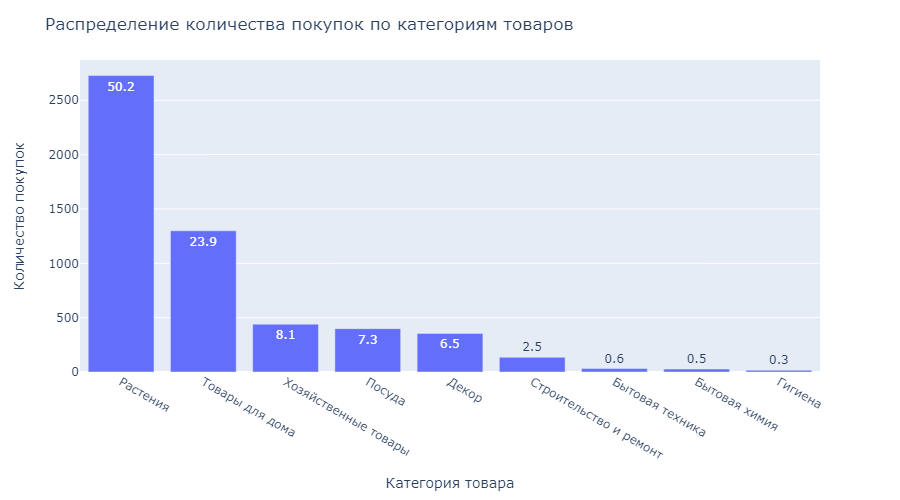

In [31]:
# Сгруппируем категории товаров по количеству покупок, совершенных в каждой категории
counts_orders_per_category = data.pivot_table(index='category', values='order_id', aggfunc=['count'])\
                                 .droplevel(level=1, axis=1)\
                                 .sort_values(by='count', ascending=False)

counts_orders_per_category['share, %'] = round(counts_orders_per_category['count'] / counts_orders_per_category['count']\
                                               .sum() * 100, 1)

# Построим диаграмму распределения количества покупок по категориям товаров
fig = px.bar(counts_orders_per_category,
             text='share, %'
            )

fig.update_layout(title='Распределение количества покупок по категориям товаров',
                  xaxis_title='Категория товара',
                  yaxis_title='Количество покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Больше половины всех покупок находятся в категории "Растения" – 50.2 %. Практически четверть покупок относится к категории "Товары для дома". Наименьшей популярностью пользуются товары в категориях "Гигиена", "Бытовая химия" и "Бытовая техника" – менее 1 %.

### Анализ суммы покупок по категориям товаров

Вновь сгруппируем таблицу по категориям товаров и проанализируем какие категори являются наиболее прибыльными.

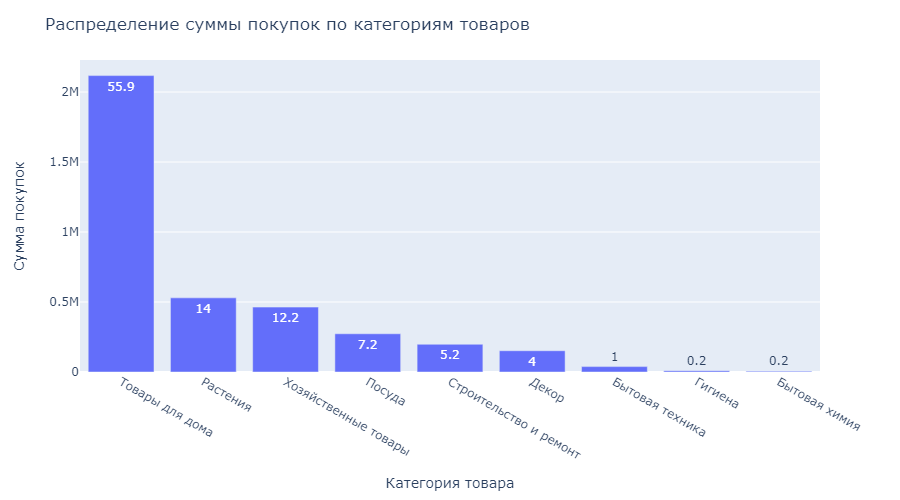

In [32]:
# Сгруппируем категории товаров по сумме заказов, совершенных в каждой категории
total_orders_by_category = data.pivot_table(index='category', values='price_all_goods', aggfunc=['sum'])\
                               .droplevel(level=1, axis=1)\
                               .sort_values(by='sum', ascending=False)

total_orders_by_category['share, %'] = round(total_orders_by_category['sum'] / total_orders_by_category['sum']\
                                               .sum() * 100, 1)

#Построим диаграмму распределения суммы покупок по категориям товаров
fig = px.bar(total_orders_by_category,
             text='share, %'
            )

fig.update_layout(title='Распределение суммы покупок по категориям товаров',
                  xaxis_title='Категория товара',
                  yaxis_title='Сумма покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Наибольшую выручку приносят заказы товаров для дома – более двух миллионов рублей (55.9 %). Не смотря на большую популярность растений выручка от продаж данной категории товаров составляет всего 14 % (529 629 рублей). Наименьшая прибыль фиксируется для товаров в категориях "Бытовая химия" и "Гигиена" – менее 1 %.

## Сегментация и анализ покупателей на основе истории заказов

### Формирование RFM-таблицы

Сформируем RFM-таблицу, в которой для каждого уникального пользователя рассчитаем три ключевых показателя: **Recency** (разницу между текущей датой и датой последнего заказа), **Frequency** (количество заказов, совершенных пользователем) и **Monetary** (сумма покупок).

Учитывая не самые "свежие" данные датасета, в качестве текущей даты от которой мы будет отсчитывать крайнюю дату заказа возьмем последнею дату заказа в датасете и прибавим к ней один день.

In [33]:
# Зададим текущую дату
last_date = data['date'].max() + timedelta(days=1)

# Сгруппируем пользователей по трем ключевым показателям Recency, Frequency и Monetary
rfm_table = data.reset_index().groupby('customer_id').agg({'date': lambda x: (last_date - x.max()).days,
                                                           'order_id': 'nunique', 
                                                           'price_all_goods': 'sum'})
# Переименуем столбцы
rfm_table.rename(columns={'date': 'recency', 
                          'order_id': 'frequency', 
                          'price_all_goods': 'monetary_value'}, inplace=True)

rfm_table

,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,108,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,350,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,110,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,370,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,125,1,2324.0
...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,13,2,1739.0
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,94,1,397.0
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,414,1,389.0


В итоговой таблице для каждого пользователя рассчитаны значения каждого ключевого параметра (Recency, Frequency и Monetary).

### Определение рейтинга пользователей

Разобьем каждый ключевой показатель RFM-таблицы на три сегмента и рассчитаем квантили для каждого из них.

In [34]:
quantiles = rfm_table.quantile(q=[0.40, 0.80])
quantiles = quantiles.to_dict()

quantiles

{'recency': {0.4: 142.0, 0.8: 372.60000000000014},
 'frequency': {0.4: 1.0, 0.8: 2.0},
 'monetary_value': {0.4: 644.0, 0.8: 2105.0000000000014}}

Учитывая крайне большое количество пользователей совершивших 1-2 заказа скорректируем квантили для показателя Frequency вручную.

In [35]:
quantiles = {
    'recency': {0.4: 142.0, 0.8: 373.0},
    'frequency': {0.4: 2.0, 0.8: 3.0},
    'monetary_value': {0.4: 645.2, 0.8: 2109.8}
}

quantiles

{'recency': {0.4: 142.0, 0.8: 373.0},
 'frequency': {0.4: 2.0, 0.8: 3.0},
 'monetary_value': {0.4: 645.2, 0.8: 2109.8}}

Создадим функции для расчета сегментации пользователей по каждому ключевому показателю таблицы RFM.

Наибольшее количество (Frequency) и стоимость заказов (Monetary) для каждого пользователя приравняем к 3, а наименьшее – к 1. Для показателя Recency наилучшим значением будет минимальное количество прошедших дней с момента текущей даты, а значит минимальное значение этого параметра приравняем к 3, а максимальное – к 1.

In [36]:
rfm_segments = rfm_table

# Создаем функции для каждого ключевого показателя RFM-таблицы
# с целью сегментации пользователя в зависимости от квантиля
def r_score(x,p,d):
    if x <= d[p][0.4]:
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
def f_score(x,p,d):
    if x < d[p][0.4]:
        return 1
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 3
    
def m_score(x,p,d):
    if x <= d[p][0.4]:
        return 1
    elif x <= d[p][0.8]:
        return 2
    else:
        return 3

# Применяем функции для каждого ключевого показателя RFM-таблицы 
# и создаем дополнительный столбец с итоговой комбинацией сегмента
rfm_segments['r_quartile'] = rfm_segments['recency'].apply(r_score, args=('recency', quantiles,))
rfm_segments['f_quartile'] = rfm_segments['frequency'].apply(f_score, args=('frequency', quantiles,))
rfm_segments['m_quartile'] = rfm_segments['monetary_value'].apply(m_score, args=('monetary_value', quantiles,))
rfm_segments['rfm_score'] = rfm_segments.r_quartile.map(str)\
                            + rfm_segments.f_quartile.map(str)\
                            + rfm_segments.m_quartile.map(str)

# сбросим индексы и приведем столбцы к одному уровню
rfm_segments = rfm_segments.reset_index()
rfm_segments.columns = [''.join(col).strip() for col in rfm_segments.columns.values]

rfm_segments

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108,1,555.0,3,1,1,311
1,001cee7f-0b29-4716-b202-0042213ab038,350,1,442.0,2,1,1,211
2,00299f34-5385-4d13-9aea-c80b81658e1b,110,1,914.0,3,1,2,312
3,002d4d3a-4a59-406b-86ec-c3314357e498,370,1,1649.0,2,1,2,212
4,003bbd39-0000-41ff-b7f9-2ddaec152037,125,1,2324.0,3,1,3,313
...,...,...,...,...,...,...,...,...
2423,ff601403-b094-4b86-9ac6-264d725b9277,13,2,1739.0,3,2,2,322
2424,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,94,1,397.0,3,1,1,311
2425,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,414,1,389.0,1,1,1,111
2426,ffb80538-3fda-4351-8ea9-9d2bec58bb07,145,1,974.0,2,1,2,212


В итоговой таблице каждому пользователю присвоено комбинационное значение в столбце `rfm_score` (рейтинг). Наилучшей комбинацией будет считаться 333, а наихудшей – 111.

### Анализ пользователей по рейтингу

Сгруппируем пользователей по рейтингу и проанализируем их количество на столбчатой диаграмме.

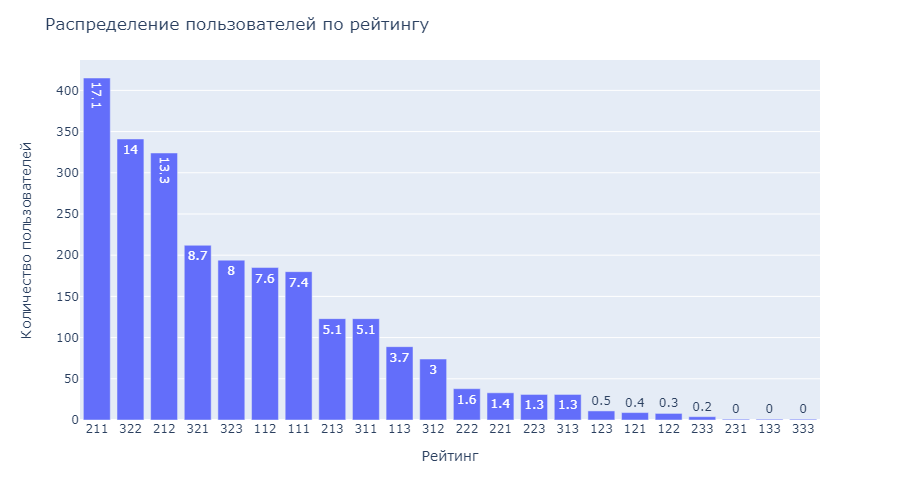

In [37]:
# Сгруппируем сегменты по количеству пользователей в каждом из них
unique_customers_rfm = rfm_segments.pivot_table(index='rfm_score', values='customer_id', aggfunc=['nunique'])\
                                   .droplevel(level=1, axis=1)\
                                   .sort_values(by='nunique', ascending=False)

# Рассчитаем долю таких пользователей
unique_customers_rfm['share, %'] = round(unique_customers_rfm['nunique'] / unique_customers_rfm['nunique'].sum() * 100, 1)


# Построим диаграмму распределения количества пользователей по каждому рейтингу
fig = px.bar(unique_customers_rfm,
             text='share, %'
            )

fig.update_layout(title='Распределение пользователей по рейтингу',
                  xaxis_title='Рейтинг',
                  yaxis_title='Количество пользователей',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Наибольшее количество пользователей имеют рейтинг "211" – 415 покупателей (17.1 %). Такие пользователи совершили только один заказ на минимальную сумму до 644 рублей относительно недавно (от 142 до 373 дней назад).

Пользователь с наилучшим рейтингом "333" всего один, а покупателей с худшим рейтингом "111" – 7.4 % (180 покупателей).

Укрупним сегменты с целью получения более крупных кластеров покупателей, что позволит в дальнейшем упростит их анализ и выработать наиболее эффективную маркетинговую стратегию.

Для этого разобьем все рейтинги на 5 кластеров пользователей:

**Лучшие клиенты** - клиенты, которые совершают покупки часто, покупают много и приносят большой доход. В этот кластер войдут пользователи с рейтингами "333", "323", "233" и "322".

**Верные клиенты** - клиенты, которые совершают покупки часто, но меньшего объема, чем лучшие клиенты. В этот кластер войдут пользователи с рейтингами "321", "222", "221", "212", "231", "223", "213".

**Новые клиенты** - клиенты, которые совершили небольшой объем покупок относительно недавно. В этот кластер войдут пользователи с рейтингами "311", "312" и "313".

**Спящие клиенты** - клиенты, которые совершали покупки регулярно в прошлом, но перестали совершать покупки на данный момент. В этот кластер войдут пользователи с рейтингами "133", "123", "122" и "113".

**Потерянные клиенты** - клиенты, которые не совершали покупки в течение длительного времени и могут быть потеряны. В этот кластер войдут пользователи с рейтингами "111", "112", "121" и "211".

In [38]:
# Создадим функцию для получения новых кластеров пользователей в зависимости от рейтинга
def assign_category(score):
    if score in ['333', '323', '233', '322']:
        return 'Лучшие клиенты'
    elif score in ['321', '222', '221', '212', '231', '223', '213']:
        return 'Верные клиенты'
    elif score in ['311', '312', '313']:
        return 'Новые клиенты'
    elif score in ['133', '123', '122', '113']:
        return 'Спящие клиенты'
    elif score in ['111', '112', '121', '211']:
        return 'Потерянные клиенты'
    else:
        return 'Inactive'

# Создадим новый столбец и применим функцию
rfm_segments['rfm_category'] = rfm_segments['rfm_score'].apply(assign_category)

rfm_segments.head(3)

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score,rfm_category
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108,1,555.0,3,1,1,311,Новые клиенты
1,001cee7f-0b29-4716-b202-0042213ab038,350,1,442.0,2,1,1,211,Потерянные клиенты
2,00299f34-5385-4d13-9aea-c80b81658e1b,110,1,914.0,3,1,2,312,Новые клиенты


Проанализируем количество пользователей в каждой новой категории.

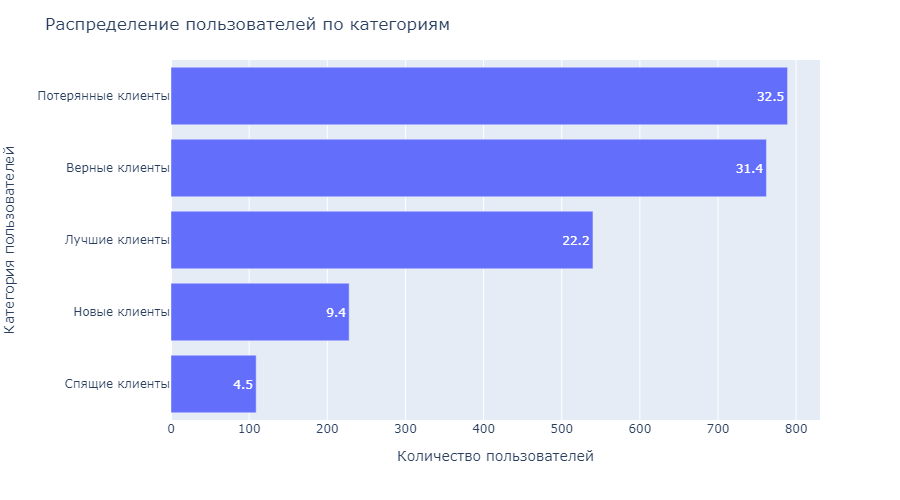

In [39]:
# Сгруппируем категории по количеству пользователей в каждой из них
unique_customers_rfm_category = rfm_segments.pivot_table(index='rfm_category', values='customer_id', aggfunc=['nunique'])\
                                            .droplevel(level=1, axis=1)\
                                            .sort_values(by='nunique', ascending=False)

# Рассчитаем долю таких пользователей и сбросим индексы
unique_customers_rfm_category['share, %'] = round(unique_customers_rfm_category['nunique']\
                                                  / unique_customers_rfm_category['nunique'].sum() * 100, 1)
unique_customers_rfm_category = unique_customers_rfm_category.reset_index()

# Построим диаграмму распределения количества пользователей по каждой категории
fig = px.bar(unique_customers_rfm_category,
             x='nunique',
             y='rfm_category',
             text='share, %'
            )

fig.update_layout(title='Распределение пользователей по категориям',
                  xaxis_title='Количество пользователей',
                  yaxis_title='Категория пользователей',
                  yaxis={'categoryorder': 'total ascending'},
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Большинство пользователей относятся к категории "Потерянные клиенты" – 789 покупателей (32.5 %). Чуть меньше пользователей наблюдается в категории "Верные клиенты" – 762 покупателя (31.4 %). Меньше всего пользователей присутствует в категории "Спящие клиенты" – 109 покупателей (4.5 %).

Для дальнейшего анализа полученных кластеров обновим датасет, добавив каждому пользователю название кластера из финальной RFM-таблицы.

In [40]:
data_new = data.merge(rfm_segments[['customer_id', 'rfm_category']], on='customer_id', how='left')

data_new.head(3)

,date,customer_id,order_id,product,quantity,price,price_all_goods,year_month,products_two_words,category,rfm_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,Комнатное растение,Растения,Потерянные клиенты
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,Комнатное растение,Растения,Потерянные клиенты
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,Радермахера d-12,Растения,Потерянные клиенты


#### Лучшие клиенты

Проанализируем основные характеристики пользователей в категории "Лучшие клиенты".

In [41]:
best_customers_pivot = data_new.query('rfm_category == "Лучшие клиенты"')\
                               .groupby('customer_id')\
                               .agg({'order_id': 'nunique',\
                                     'price_all_goods': 'sum'})

best_customers_pivot.columns = ['counts_of_orders', 'sum_of_orders']
best_customers_pivot['min_counts'] = best_customers_pivot['counts_of_orders'].min()
best_customers_pivot['max_counts'] = best_customers_pivot['counts_of_orders'].max()
best_customers_pivot['cheapest_order'] = best_customers_pivot['sum_of_orders'].min()
best_customers_pivot['most_expensive_order'] = best_customers_pivot['sum_of_orders'].max() 
best_customers_pivot['average_check_of_order'] = round(best_customers_pivot['sum_of_orders'].mean(),2)
best_customers_pivot.reset_index(inplace=True)
best_customers_pivot = best_customers_pivot.drop(['customer_id', 'counts_of_orders', 'sum_of_orders'], axis=1)

best_customers_pivot.head(1)

,min_counts,max_counts,cheapest_order,most_expensive_order,average_check_of_order
0,2,17,646.0,41900.0,2402.61


Пользователи данного кластера совершают от 2 до 17 заказов на сумму от 646 до 41 900 рублей. Средний чек заказа составляет 2 402 рубля.

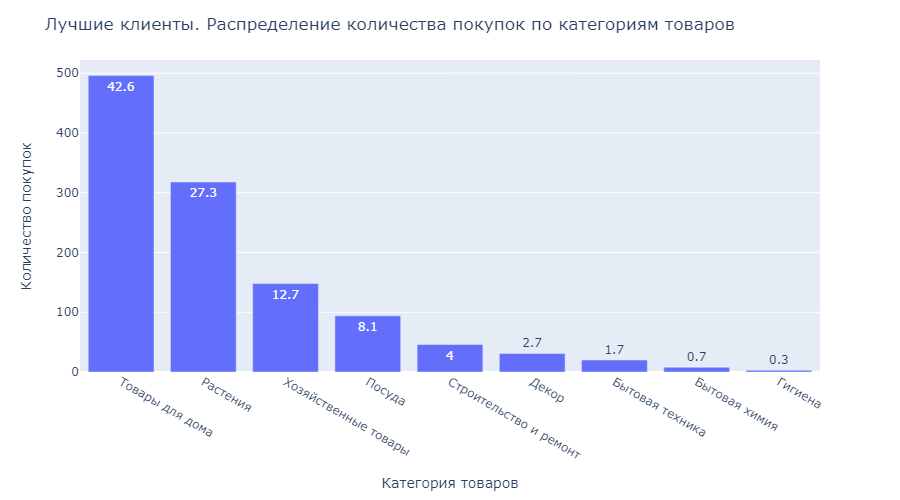

In [42]:
# Сгруппируем категории товаров по количеству покупок в каждой из них
best_customers_category = data_new.query('rfm_category == "Лучшие клиенты"')\
                                  .pivot_table(index='category', values='order_id', aggfunc='count')\
                                  .sort_values(by='order_id', ascending=False)

# Рассчитаем долю и сбросим индексы
best_customers_category['share, %'] = round(best_customers_category['order_id'] / best_customers_category['order_id']\
                                            .sum() * 100, 1)

# Построим диаграмму распределения количества покупок по каждой категории товаров
fig = px.bar(best_customers_category,
             text='share, %'
            )

fig.update_layout(title='Лучшие клиенты. Распределение количества покупок по категориям товаров',
                  xaxis_title='Категория товаров',
                  yaxis_title='Количество покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Товары для дома являются наиболее популярной категорией заказов для данных пользователей.

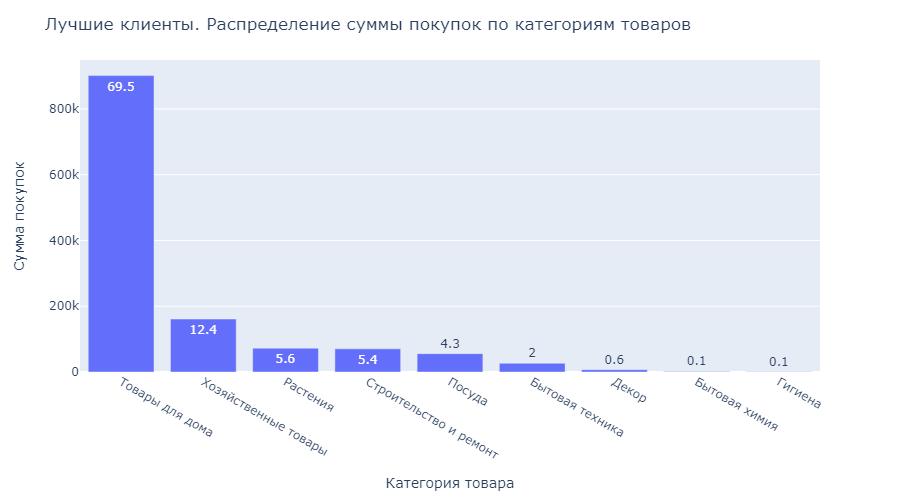

In [43]:
# Сгруппируем категории товаров по сумме покупок, совершенных в каждой категории
best_customers_total_orders_by_category = data_new.query('rfm_category == "Лучшие клиенты"')\
                                                  .pivot_table(index='category', values='price_all_goods', aggfunc=['sum'])\
                                                  .droplevel(level=1, axis=1)\
                                                  .sort_values(by='sum', ascending=False)

best_customers_total_orders_by_category['share, %'] = round(best_customers_total_orders_by_category['sum']\
                                                            / best_customers_total_orders_by_category['sum']\
                                                            .sum() * 100, 1)

# Построим диаграмму распределения суммы покупок по категориям товаров
fig = px.bar(best_customers_total_orders_by_category,
             text='share, %'
            )

fig.update_layout(title='Лучшие клиенты. Распределение суммы покупок по категориям товаров',
                  xaxis_title='Категория товара',
                  yaxis_title='Сумма покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Наибольшую выручку данные пользователи также приносят в категории "Товары для дома".

Проанализируем количество совершенных заказов по месяцам.

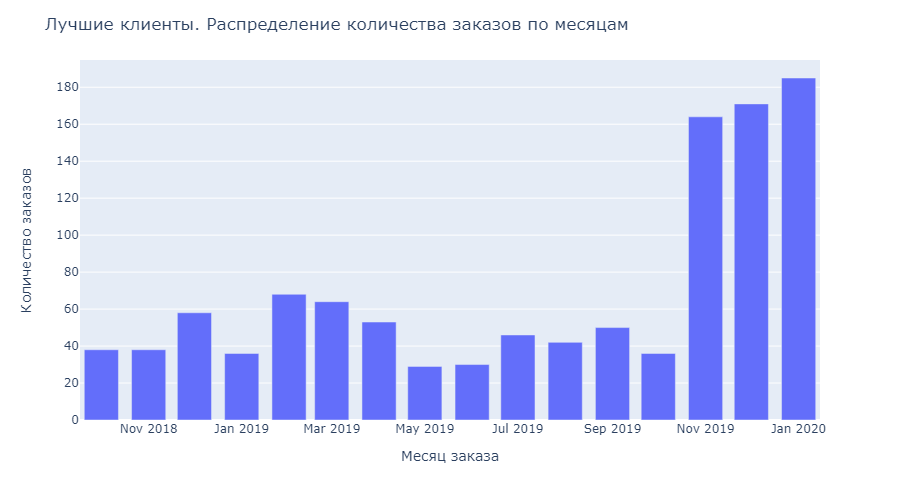

In [44]:
# Сгруппируем количество заказов по месяцам
best_customers_monthly_purchases = data_new.query('rfm_category == "Лучшие клиенты"')\
                                           .pivot_table(index='year_month', values='order_id', aggfunc='nunique')

# Построим диаграмму распределения количества заказов от месяца к месяцу
fig = px.bar(best_customers_monthly_purchases)

fig.update_layout(title='Лучшие клиенты. Распределение количества заказов по месяцам',
                  xaxis_title='Месяц заказа',
                  yaxis_title='Количество заказов',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Отмечается существенная активизация пользователей с ноября 2019 по январь 2020 года. Количество заказов увеличилось с 36 до 185 к последнему месяцу.

Определим топ-10 лучших покупателей.

In [45]:
rfm_segments.query('rfm_category == "Лучшие клиенты"')\
            .sort_values(by='rfm_score', ascending=False)\
            .head(10)\
            .reset_index(drop=True)

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score,rfm_category
0,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,93,17,21361.0,3,3,3,333,Лучшие клиенты
1,005ba170-45e8-42de-93f7-192481ae2659,88,2,7857.0,3,2,3,323,Лучшие клиенты
2,7913e482-a251-451e-b1f9-978e6e34f8ce,8,2,3413.0,3,2,3,323,Лучшие клиенты
3,83581792-1bc2-49f7-983c-a87b921ab1cb,89,2,3298.0,3,2,3,323,Лучшие клиенты
4,80e311a3-2a1f-4a56-b307-d25c1f402048,44,2,2517.0,3,2,3,323,Лучшие клиенты
5,7db2db36-5989-4305-b430-2d77d0688d0a,43,2,2143.0,3,2,3,323,Лучшие клиенты
6,7b0b570c-16c7-4aed-b302-13fe1830d1e9,118,2,3223.0,3,2,3,323,Лучшие клиенты
7,7ae8d145-f26a-468a-a1ea-f8e453125ec3,9,2,2351.0,3,2,3,323,Лучшие клиенты
8,7abce1cc-bc8c-4362-b61a-0cbb4822ed29,121,2,7950.0,3,2,3,323,Лучшие клиенты
9,78b5ab9e-999b-4825-bc44-19958d4854c1,89,2,2410.0,3,2,3,323,Лучшие клиенты


Пользователи данного кластера являются наиболее лояльными покупателями и отделу маркетинга явно стоит продолжить удерживать данных покупателей, предложив дополнительные промо-акции и скидки. 

При разработке рекламной компании отделу маркетинга стоит учитывать, что наиболее популярной категорией товаров данных пользователей является "Товары для дома". Также стоит учитывать снижение пользовательской активности данного кластера в летний период.

#### Верные клиенты

Проанализируем основные характеристики пользователей в категории "Верные клиенты".

In [46]:
loyal_customers_pivot = data_new.query('rfm_category == "Верные клиенты"')\
                                .groupby('customer_id')\
                                .agg({'order_id': 'nunique',\
                                     'price_all_goods': 'sum'})

loyal_customers_pivot.columns = ['counts_of_orders', 'sum_of_orders']
loyal_customers_pivot['min_counts'] = loyal_customers_pivot['counts_of_orders'].min()
loyal_customers_pivot['max_counts'] = loyal_customers_pivot['counts_of_orders'].max()
loyal_customers_pivot['cheapest_order'] = loyal_customers_pivot['sum_of_orders'].min()
loyal_customers_pivot['most_expensive_order'] = loyal_customers_pivot['sum_of_orders'].max() 
loyal_customers_pivot['average_check_of_order'] = round(loyal_customers_pivot['sum_of_orders'].mean(),2)
loyal_customers_pivot.reset_index(inplace=True)
loyal_customers_pivot = loyal_customers_pivot.drop(['customer_id', 'counts_of_orders', 'sum_of_orders'], axis=1)

loyal_customers_pivot.head(1)

,min_counts,max_counts,cheapest_order,most_expensive_order,average_check_of_order
0,1,4,84.0,49432.0,1590.84


Пользователи данного кластера совершают от 1 до 4 заказов на сумму от 84 до 49 432 рублей. Средний чек заказа составляет 1 590 рублей.

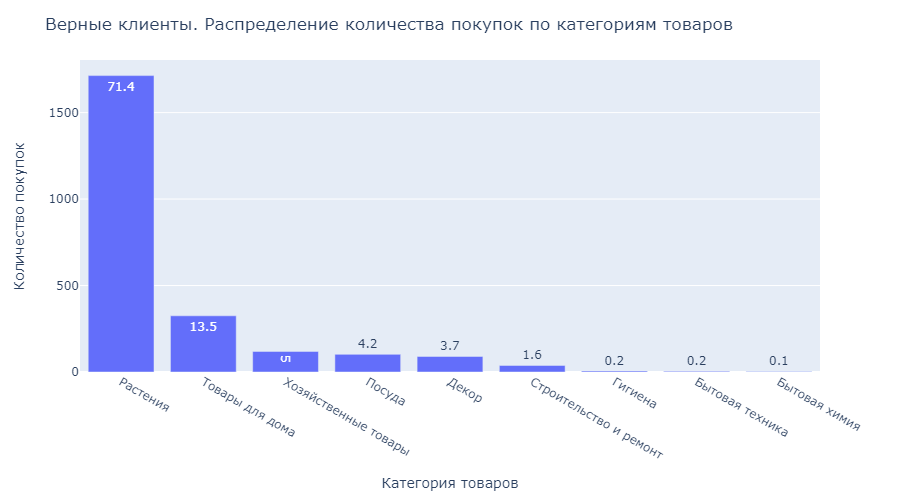

In [47]:
# Сгруппируем категории товаров по количеству покупок в каждой из них
loyal_customers_category = data_new.query('rfm_category == "Верные клиенты"')\
                                   .pivot_table(index='category', values='order_id', aggfunc='count')\
                                   .sort_values(by='order_id', ascending=False)

# Рассчитаем долю и сбросим индексы
loyal_customers_category['share, %'] = round(loyal_customers_category['order_id'] / loyal_customers_category['order_id']\
                                             .sum() * 100, 1)

# Построим диаграмму распределения количества покупок по каждой категории товаров
fig = px.bar(loyal_customers_category,
             text='share, %'
            )

fig.update_layout(title='Верные клиенты. Распределение количества покупок по категориям товаров',
                  xaxis_title='Категория товаров',
                  yaxis_title='Количество покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Растения являются наиболее популярной категорией заказов для данных пользователей.

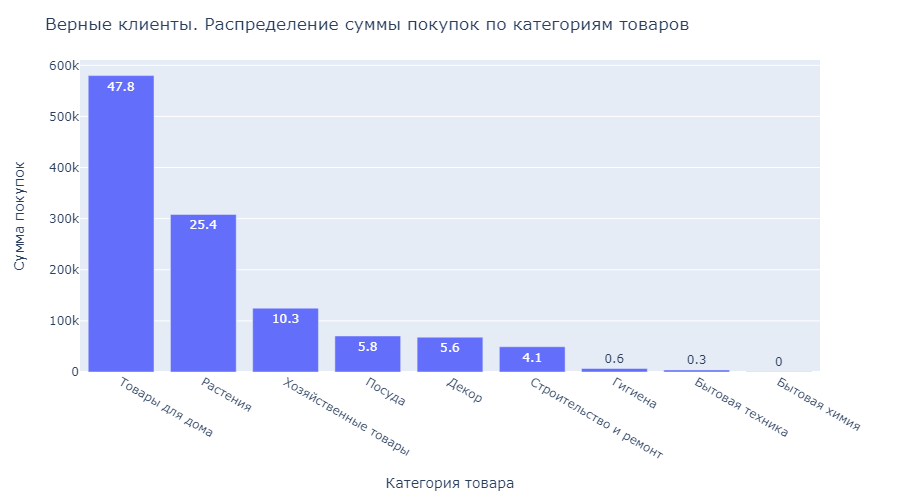

In [48]:
# Сгруппируем категории товаров по сумме покупок, совершенных в каждой категории
loyal_customers_total_orders_by_category = data_new.query('rfm_category == "Верные клиенты"')\
                                                   .pivot_table(index='category', values='price_all_goods', aggfunc=['sum'])\
                                                   .droplevel(level=1, axis=1)\
                                                   .sort_values(by='sum', ascending=False)

loyal_customers_total_orders_by_category['share, %'] = round(loyal_customers_total_orders_by_category['sum']\
                                                             / loyal_customers_total_orders_by_category['sum']\
                                                             .sum() * 100, 1)

# Построим диаграмму распределения суммы покупок по категориям товаров
fig = px.bar(loyal_customers_total_orders_by_category,
             text='share, %'
            )

fig.update_layout(title='Верные клиенты. Распределение суммы покупок по категориям товаров',
                  xaxis_title='Категория товара',
                  yaxis_title='Сумма покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Не смотря на большую популярность категории "Растения" в данном кластере покупателей, основная выручка приходится на категорию "Товары для дома".

Проанализируем количество совершенных заказов по месяцам.

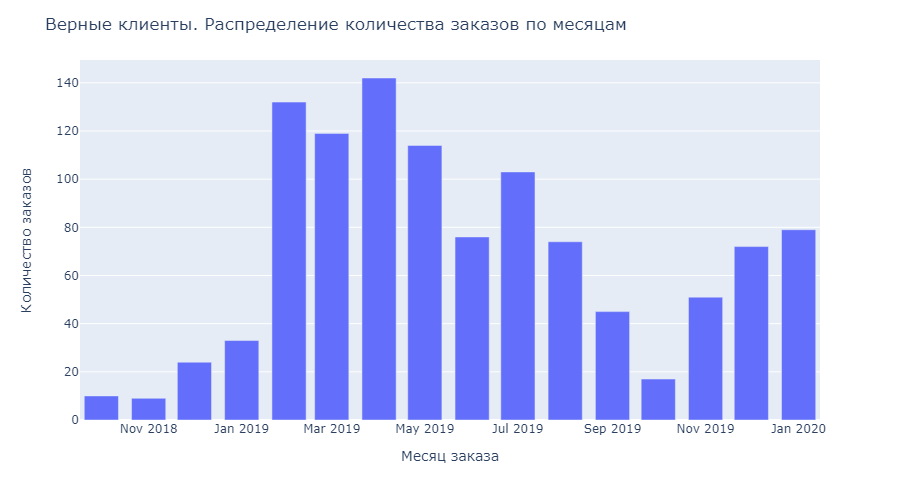

In [49]:
# Сгруппируем количество заказов по месяцам
loyal_customers_monthly_purchases = data_new.query('rfm_category == "Верные клиенты"')\
                                            .pivot_table(index='year_month', values='order_id', aggfunc='nunique')

# Построим диаграмму распределения количества заказов от месяца к месяцу
fig = px.bar(loyal_customers_monthly_purchases)

fig.update_layout(title='Верные клиенты. Распределение количества заказов по месяцам',
                  xaxis_title='Месяц заказа',
                  yaxis_title='Количество заказов',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Период с февраля по май 2019 года является наилучшим по количеству совершенных заказов. Учитывая преимущественный интерес данных пользователей к растениям, данные высокие значения могут быть связаны с необходимостью высадки саженцев в весенний период.

Определим топ-10 верных покупателей.

In [50]:
rfm_segments.query('rfm_category == "Верные клиенты"')\
            .sort_values(by='monetary_value', ascending=False)\
            .head(10)\
            .reset_index(drop=True)

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score,rfm_category
0,146cd9bf-a95c-4afb-915b-5f6684b17444,235,1,49432.0,2,1,3,213,Верные клиенты
1,940c175f-ea87-44e0-9e16-0a3d0a9abecd,234,2,20232.0,2,2,3,223,Верные клиенты
2,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,362,1,16536.0,2,1,3,213,Верные клиенты
3,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,257,1,15300.0,2,1,3,213,Верные клиенты
4,0d87f4ae-465a-4fac-81e6-5d629761783e,187,1,14917.0,2,1,3,213,Верные клиенты
5,a9089b7e-e6a5-48f9-9b76-48693b63a092,260,3,11495.0,2,2,3,223,Верные клиенты
6,af4d270b-c7ae-4af5-9582-4e61ff08eff0,359,1,11000.0,2,1,3,213,Верные клиенты
7,02adb72a-3067-45e9-a3b5-f93d79d7496a,302,2,10723.0,2,2,3,223,Верные клиенты
8,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,269,1,10656.0,2,1,3,213,Верные клиенты
9,126dac4d-6486-49ed-a1be-9fd55a38a9de,157,2,9148.0,2,2,3,223,Верные клиенты


Пользователи данного кластера совершаю покупки в меньших объемах и на меньшую сумму в сравнении с лучшими клиентами.


Отделу маркетинга стоит сделать упор на категорию "Растения" при разработке рекламной компании для данного кластера, а также учитывать увеличение пользовательской активности в весенний период.

#### Новые клиенты

Проанализируем основные характеристики пользователей в категории "Новые клиенты".

In [51]:
new_customers_pivot = data_new.query('rfm_category == "Новые клиенты"')\
                              .groupby('customer_id')\
                              .agg({'order_id': 'nunique',\
                                     'price_all_goods': 'sum'})

new_customers_pivot.columns = ['counts_of_orders', 'sum_of_orders']
new_customers_pivot['min_counts'] = new_customers_pivot['counts_of_orders'].min()
new_customers_pivot['max_counts'] = new_customers_pivot['counts_of_orders'].max()
new_customers_pivot['cheapest_order'] = new_customers_pivot['sum_of_orders'].min()
new_customers_pivot['most_expensive_order'] = new_customers_pivot['sum_of_orders'].max() 
new_customers_pivot['average_check_of_order'] = round(new_customers_pivot['sum_of_orders'].mean(),2)
new_customers_pivot.reset_index(inplace=True)
new_customers_pivot = new_customers_pivot.drop(['customer_id', 'counts_of_orders', 'sum_of_orders'], axis=1)

new_customers_pivot.head(1)

,min_counts,max_counts,cheapest_order,most_expensive_order,average_check_of_order
0,1,1,22.0,7724.0,1085.15


Пользователи данного кластера совершили только 1 заказ на сумму от 22 до 7 724 рублей. Средний чек заказа составляет 1 085 рублей.

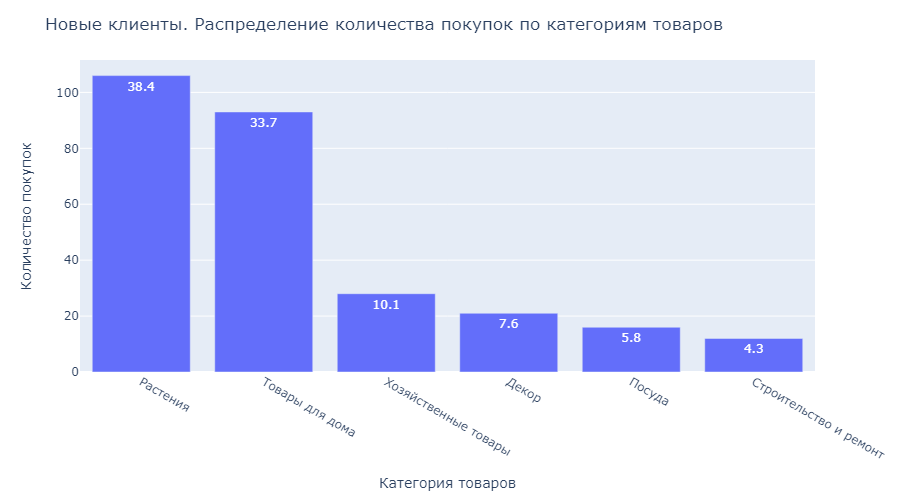

In [52]:
# Сгруппируем категории товаров по количеству покупок в каждой из них
new_customers_category = data_new.query('rfm_category == "Новые клиенты"')\
                                 .pivot_table(index='category', values='order_id', aggfunc='count')\
                                 .sort_values(by='order_id', ascending=False)

# Рассчитаем долю и сбросим индексы
new_customers_category['share, %'] = round(new_customers_category['order_id'] / new_customers_category['order_id']\
                                           .sum() * 100, 1)

# Построим диаграмму распределения количества покупок по каждой категории товаров
fig = px.bar(new_customers_category,
             text='share, %'
            )

fig.update_layout(title='Новые клиенты. Распределение количества покупок по категориям товаров',
                  xaxis_title='Категория товаров',
                  yaxis_title='Количество покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Растения также являются наиболее популярной категорией заказов для данных пользователей. Покупки в категориях "Гигиена", "Бытовая техника", и "Бытовая химия" данные пользователи не совершают

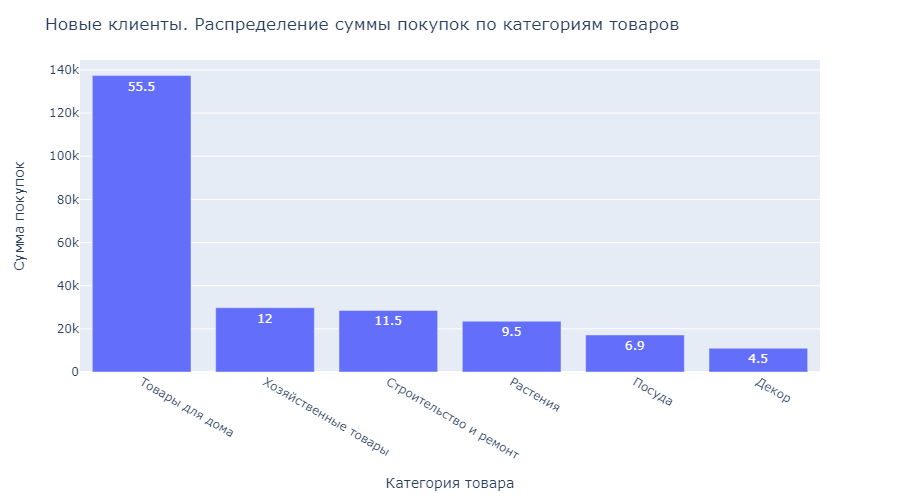

In [53]:
# Сгруппируем категории товаров по сумме покупок, совершенных в каждой категории
new_customers_total_orders_by_category = data_new.query('rfm_category == "Новые клиенты"')\
                                                 .pivot_table(index='category', values='price_all_goods', aggfunc=['sum'])\
                                                 .droplevel(level=1, axis=1)\
                                                 .sort_values(by='sum', ascending=False)

new_customers_total_orders_by_category['share, %'] = round(new_customers_total_orders_by_category['sum']\
                                                           / new_customers_total_orders_by_category['sum']\
                                                           .sum() * 100, 1)

# Построим диаграмму распределения суммы покупок по категориям товаров
fig = px.bar(new_customers_total_orders_by_category,
             text='share, %'
            )

fig.update_layout(title='Новые клиенты. Распределение суммы покупок по категориям товаров',
                  xaxis_title='Категория товара',
                  yaxis_title='Сумма покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Наибольшую выручку, как и для двух предыдущих групп пользователей, приносят "Товары для дома".

Проанализируем количество совершенных заказов по месяцам.

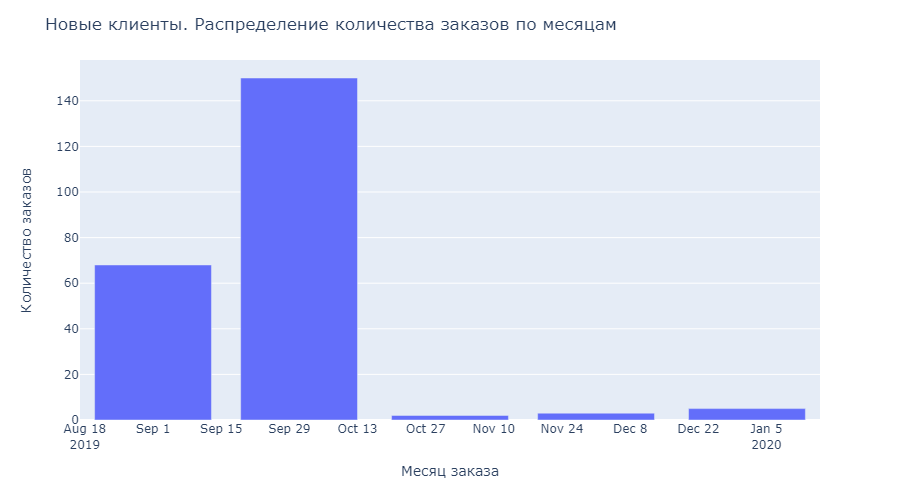

In [54]:
# Сгруппируем количество заказов по месяцам
new_customers_monthly_purchases = data_new.query('rfm_category == "Новые клиенты"')\
                                          .pivot_table(index='year_month', values='order_id', aggfunc='nunique')

# Построим диаграмму распределения количества заказов от месяца к месяцу
fig = px.bar(new_customers_monthly_purchases)

fig.update_layout(title='Новые клиенты. Распределение количества заказов по месяцам',
                  xaxis_title='Месяц заказа',
                  yaxis_title='Количество заказов',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Отмечается существенное снижение активности данной группы пользователей с ноября 2019 по январь 2020 года. Количество заказов снизилось со 150 до 5 к последнему месяцу.

Определим топ-10 новых покупателей.

In [55]:
rfm_segments.query('rfm_category == "Новые клиенты"')\
            .sort_values(by='recency')\
            .head(10)\
            .reset_index(drop=True)

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score,rfm_category
0,a7ef9c85-57e1-45ad-89c9-8b405339d4c8,9,1,1930.5,3,1,2,312,Новые клиенты
1,a843e87d-c9b8-475a-96fb-1edcccca5f8e,24,1,60.0,3,1,1,311,Новые клиенты
2,95872093-2887-4ce8-8468-19234990e7d7,27,1,179.0,3,1,1,311,Новые клиенты
3,9ecc5887-b4d4-4cea-b446-88748df71d9c,28,1,1799.0,3,1,2,312,Новые клиенты
4,753660bf-a1ea-4447-853d-622e47c1c6ac,29,1,97.0,3,1,1,311,Новые клиенты
5,fd4af93f-9fbd-449f-91f8-b42b830e265b,32,1,569.0,3,1,1,311,Новые клиенты
6,00c95d20-923e-4b45-88fc-53b12931d462,44,1,186.5,3,1,1,311,Новые клиенты
7,d1bf7700-6afa-4297-9220-48e6aa0d7e2c,45,1,164.0,3,1,1,311,Новые клиенты
8,22e4d79f-3613-4c22-8b01-7f880120bf5a,74,1,427.0,3,1,1,311,Новые клиенты
9,e3805ccd-2d64-4d0e-92dd-902293555c35,78,1,355.5,3,1,1,311,Новые клиенты


Пользователи данного кластера являются новыми: они совершили только один заказ относительно недавно.

Отделу маркетинга необходимо дополнительно простимулировать таких пользователей покупать чаще, учитывая снижение пользовательской активности данного кластера в последние месяцы. Упор при разработке рекламной компании для данной группы пользователей стоит сделать как на категорию "Растения", так и на категорию "Товары для дома".

#### Спящие клиенты

Проанализируем основные характеристики пользователей в категории "Спящие клиенты".

In [56]:
sleeping_customers_pivot = data_new.query('rfm_category == "Спящие клиенты"')\
                                   .groupby('customer_id')\
                                   .agg({'order_id': 'nunique',\
                                     'price_all_goods': 'sum'})

sleeping_customers_pivot.columns = ['counts_of_orders', 'sum_of_orders']
sleeping_customers_pivot['min_counts'] = sleeping_customers_pivot['counts_of_orders'].min()
sleeping_customers_pivot['max_counts'] = sleeping_customers_pivot['counts_of_orders'].max()
sleeping_customers_pivot['cheapest_order'] = sleeping_customers_pivot['sum_of_orders'].min()
sleeping_customers_pivot['most_expensive_order'] = sleeping_customers_pivot['sum_of_orders'].max() 
sleeping_customers_pivot['average_check_of_order'] = round(sleeping_customers_pivot['sum_of_orders'].mean(),2)
sleeping_customers_pivot.reset_index(inplace=True)
sleeping_customers_pivot = sleeping_customers_pivot.drop(['customer_id', 'counts_of_orders', 'sum_of_orders'], axis=1)

sleeping_customers_pivot.head(1)

,min_counts,max_counts,cheapest_order,most_expensive_order,average_check_of_order
0,1,35,688.0,57278.0,5653.06


Пользователи данного кластера в прошлом совершали от 1 до 35 заказов на сумму от 688 до 57 278 рублей. Средний чек заказа составлял 5 653 рубля.

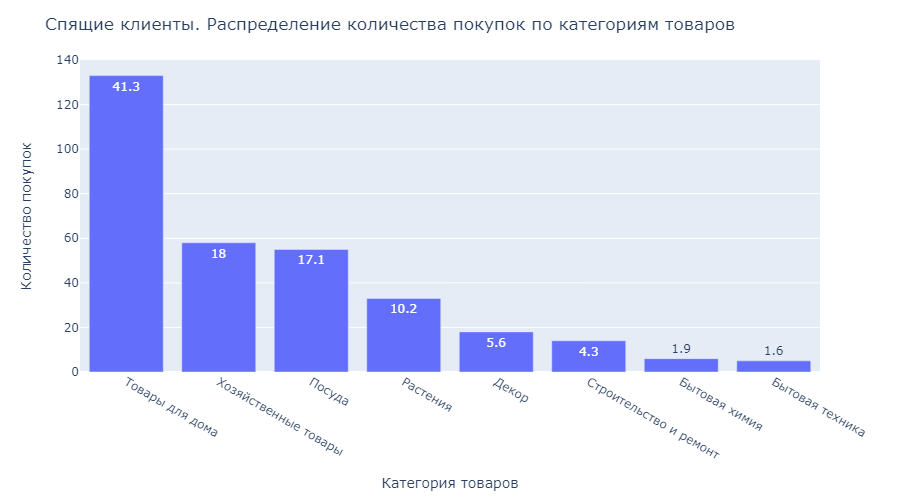

In [57]:
# Сгруппируем категории товаров по количеству покупок в каждой из них
sleeping_customers_category = data_new.query('rfm_category == "Спящие клиенты"')\
                                      .pivot_table(index='category', values='order_id', aggfunc='count')\
                                      .sort_values(by='order_id', ascending=False)

# Рассчитаем долю и сбросим индексы
sleeping_customers_category['share, %'] = round(sleeping_customers_category['order_id']\
                                                / sleeping_customers_category['order_id']\
                                                .sum() * 100, 1)

# Построим диаграмму распределения количества покупок по каждой категории товаров
fig = px.bar(sleeping_customers_category,
             text='share, %'
            )

fig.update_layout(title='Спящие клиенты. Распределение количества покупок по категориям товаров',
                  xaxis_title='Категория товаров',
                  yaxis_title='Количество покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Наиболее предпочитаемой категорией товаров данной группы пользователей являлись товары для дома – 41.3 %.

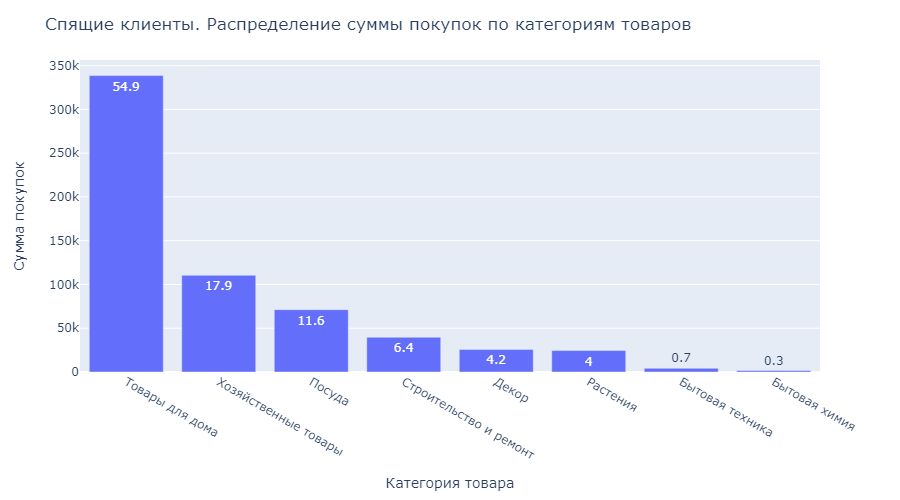

In [58]:
# Сгруппируем категории товаров по сумме покупок, совершенных в каждой категории
sleeping_customers_total_orders_by_category = data_new.query('rfm_category == "Спящие клиенты"')\
                                                      .pivot_table(index='category', values='price_all_goods', aggfunc=['sum'])\
                                                      .droplevel(level=1, axis=1)\
                                                      .sort_values(by='sum', ascending=False)

sleeping_customers_total_orders_by_category['share, %'] = round(sleeping_customers_total_orders_by_category['sum']\
                                                                / sleeping_customers_total_orders_by_category['sum']\
                                                                .sum() * 100, 1)

# Построим диаграмму распределения суммы покупок по категориям товаров
fig = px.bar(sleeping_customers_total_orders_by_category,
             text='share, %'
            )

fig.update_layout(title='Спящие клиенты. Распределение суммы покупок по категориям товаров',
                  xaxis_title='Категория товара',
                  yaxis_title='Сумма покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Наибольшую выручку данные пользователи также приносили в категории "Товары для дома" (более 300 000 рублей).

Проанализируем количество совершенных заказов по месяцам.

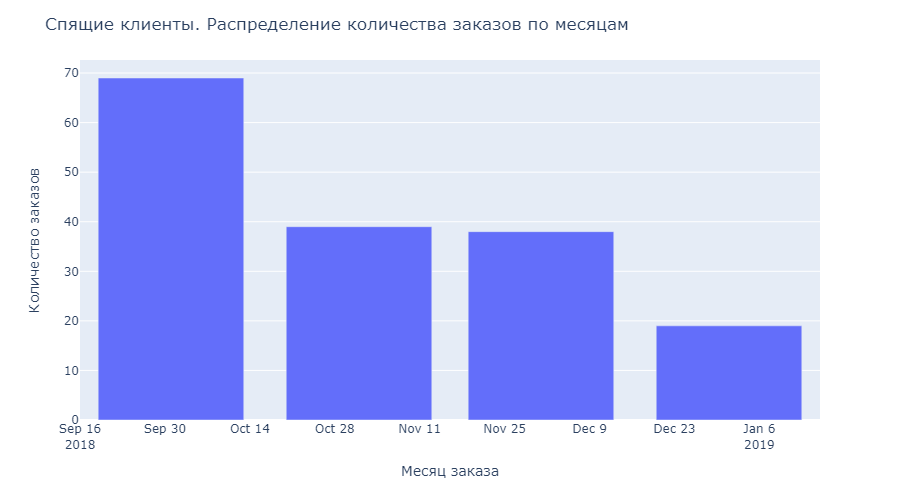

In [59]:
# Сгруппируем количество заказов по месяцам
sleeping_customers_monthly_purchases = data_new.query('rfm_category == "Спящие клиенты"')\
                                               .pivot_table(index='year_month', values='order_id', aggfunc='nunique')

# Построим диаграмму распределения количества заказов от месяца к месяцу
fig = px.bar(sleeping_customers_monthly_purchases)

fig.update_layout(title='Спящие клиенты. Распределение количества заказов по месяцам',
                  xaxis_title='Месяц заказа',
                  yaxis_title='Количество заказов',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Пользователи данной группы совершали свои заказы с октября 2018 по январь 2019 года. Количество заказов снижалось от месяца к месяцу с 69 до 19. В связи с малым временным периодом говорить о сезонности для данного кластера пользователей не приходится.

Определим топ-10 спящих покупателей.

In [60]:
rfm_segments.query('rfm_category == "Спящие клиенты"')\
            .sort_values(by='monetary_value', ascending=False)\
            .head(10)\
            .reset_index(drop=True)

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score,rfm_category
0,4d93d3f6-8b24-403b-a74b-f5173e40d7db,465,35,57278.0,1,3,3,133,Спящие клиенты
1,58a4c3cc-504f-43ea-a74a-bae19e665552,382,2,53232.0,1,2,3,123,Спящие клиенты
2,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,429,1,33680.0,1,1,3,113,Спящие клиенты
3,6987e6d6-a63a-4ce2-a2d0-f424092d235e,407,1,32718.0,1,1,3,113,Спящие клиенты
4,1b2764ad-9151-4051-a46a-9b01b62e6335,452,1,24370.0,1,1,3,113,Спящие клиенты
5,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,463,1,22056.0,1,1,3,113,Спящие клиенты
6,639c4989-b0ab-412a-b7ec-be394cb2d372,453,3,12095.0,1,2,3,123,Спящие клиенты
7,86c97bf1-c834-423e-9e38-8acda68f97e8,411,2,11548.0,1,2,3,123,Спящие клиенты
8,6be74251-7159-4cc0-99fb-d034a17c61b0,375,1,11250.0,1,1,3,113,Спящие клиенты
9,7d8528bb-623e-477f-a059-efc312b62d29,431,1,9915.0,1,1,3,113,Спящие клиенты


Пользователи данного кластера совершали свои заказы достаточно давно, однако количество и суммы данных заказов в прошлом были большими.

Отделу маркетинга стоит попробовать вновь привлечь данных покупателей при разработке рекламной компании. Особый интерес для данного кластера покупателей представляют товары для дома.

#### Потерянные клиенты

Проанализируем основные характеристики пользователей в категории "Потерянные клиенты".

In [61]:
lost_customers_pivot = data_new.query('rfm_category == "Потерянные клиенты"')\
                               .groupby('customer_id')\
                               .agg({'order_id': 'nunique',\
                                     'price_all_goods': 'sum'})

lost_customers_pivot.columns = ['counts_of_orders', 'sum_of_orders']
lost_customers_pivot['min_counts'] = lost_customers_pivot['counts_of_orders'].min()
lost_customers_pivot['max_counts'] = lost_customers_pivot['counts_of_orders'].max()
lost_customers_pivot['cheapest_order'] = lost_customers_pivot['sum_of_orders'].min()
lost_customers_pivot['most_expensive_order'] = lost_customers_pivot['sum_of_orders'].max() 
lost_customers_pivot['average_check_of_order'] = round(lost_customers_pivot['sum_of_orders'].mean(),2)
lost_customers_pivot.reset_index(inplace=True)
lost_customers_pivot = lost_customers_pivot.drop(['customer_id', 'counts_of_orders', 'sum_of_orders'], axis=1)

lost_customers_pivot.head(1)

,min_counts,max_counts,cheapest_order,most_expensive_order,average_check_of_order
0,1,2,15.0,2109.0,524.93


Пользователи данного кластера совершали от 1 до 2 заказов на сумму от 15 до 2 109 рублей. Средний чек заказа составлял 524 рубля.

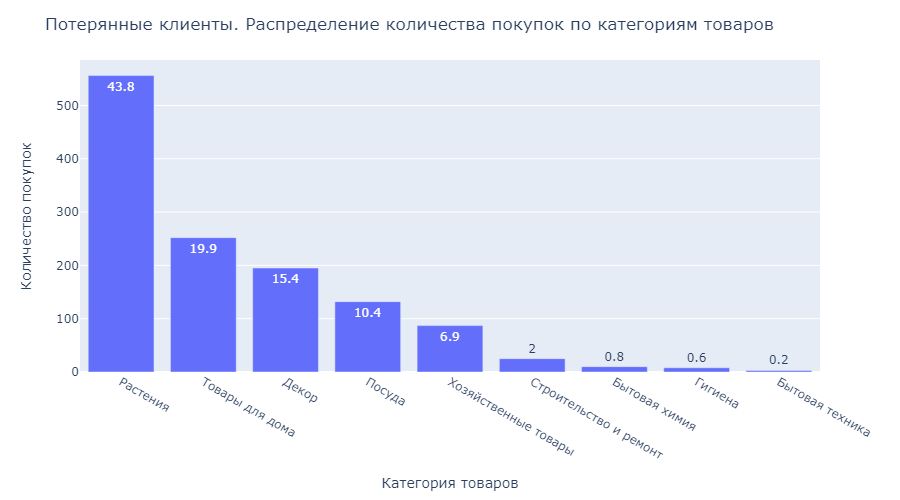

In [62]:
# Сгруппируем категории товаров по количеству покупок в каждой из них
lost_customers_category = data_new.query('rfm_category == "Потерянные клиенты"')\
                                  .pivot_table(index='category', values='order_id', aggfunc='count')\
                                  .sort_values(by='order_id', ascending=False)

# Рассчитаем долю и сбросим индексы
lost_customers_category['share, %'] = round(lost_customers_category['order_id'] / lost_customers_category['order_id']\
                                            .sum() * 100, 1)

# Построим диаграмму распределения количества покупок по каждой категории товаров
fig = px.bar(lost_customers_category,
             text='share, %'
            )

fig.update_layout(title='Потерянные клиенты. Распределение количества покупок по категориям товаров',
                  xaxis_title='Категория товаров',
                  yaxis_title='Количество покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Растения являлись наиболее популярной категорией заказов для данных пользователей.

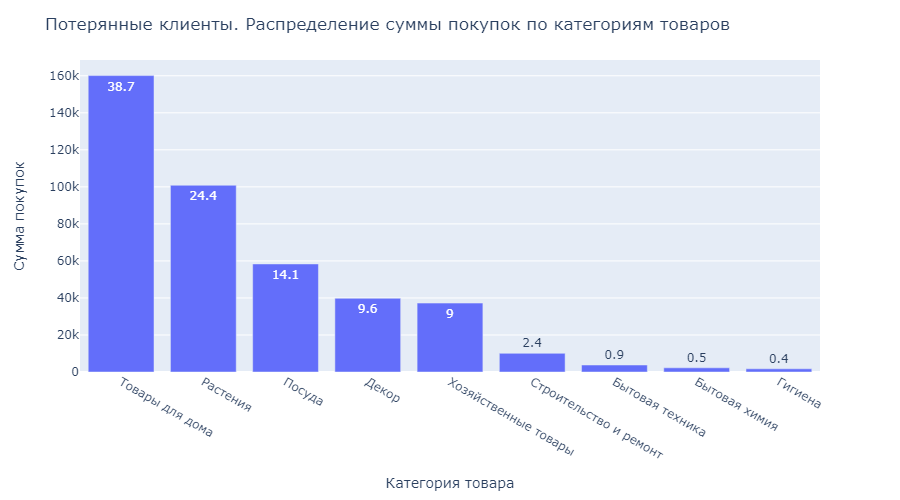

In [63]:
# Сгруппируем категории товаров по сумме покупок, совершенных в каждой категории
lost_customers_total_orders_by_category = data_new.query('rfm_category == "Потерянные клиенты"')\
                                                  .pivot_table(index='category', values='price_all_goods', aggfunc=['sum'])\
                                                  .droplevel(level=1, axis=1)\
                                                  .sort_values(by='sum', ascending=False)

lost_customers_total_orders_by_category['share, %'] = round(lost_customers_total_orders_by_category['sum']\
                                                            / lost_customers_total_orders_by_category['sum']\
                                                            .sum() * 100, 1)

# Построим диаграмму распределения суммы покупок по категориям товаров
fig = px.bar(lost_customers_total_orders_by_category,
             text='share, %'
            )

fig.update_layout(title='Потерянные клиенты. Распределение суммы покупок по категориям товаров',
                  xaxis_title='Категория товара',
                  yaxis_title='Сумма покупок',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Не смотря на большую популярность категории "Растения" в данном кластере покупателей, основная выручка приходилась на категорию "Товары для дома".

Проанализируем количество совершенных заказов по месяцам.

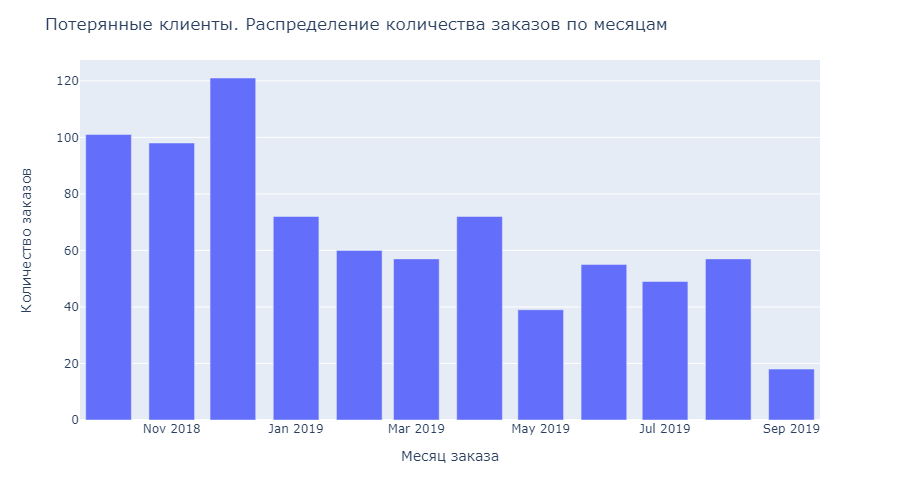

In [64]:
# Сгруппируем количество заказов по месяцам
lost_customers_monthly_purchases = data_new.query('rfm_category == "Потерянные клиенты"')\
                                           .pivot_table(index='year_month', values='order_id', aggfunc='nunique')

# Построим диаграмму распределения количества заказов от месяца к месяцу
fig = px.bar(lost_customers_monthly_purchases)

fig.update_layout(title='Потерянные клиенты. Распределение количества заказов по месяцам',
                  xaxis_title='Месяц заказа',
                  yaxis_title='Количество заказов',
                  showlegend=False,
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Пользовательская активность данного кластера покупателей ежемесячно снижалась с октября 2018 по сентябрь 2019 года со 101 до 18 заказов.

Определим топ-10 потерянных покупателей.

In [65]:
rfm_segments.query('rfm_category == "Потерянные клиенты"')\
            .sort_values(by='monetary_value', ascending=False)\
            .head(10)\
            .reset_index(drop=True)

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score,rfm_category
0,81a07ad7-0646-477c-9e11-0a52c6f6f7e1,435,1,2109.0,1,1,2,112,Потерянные клиенты
1,c1d41ad2-5466-49e8-bde6-e6b237f158ab,408,1,2098.0,1,1,2,112,Потерянные клиенты
2,3bc760df-7192-4ebc-9403-21ad69060f00,480,1,2083.0,1,1,2,112,Потерянные клиенты
3,4809bbb1-f942-40ac-b666-7b8c771d279e,391,1,2024.0,1,1,2,112,Потерянные клиенты
4,f7387022-163b-492e-a496-d87b83e9f070,423,1,2024.0,1,1,2,112,Потерянные клиенты
5,49aa129a-57c7-4919-9409-b7dedfdad041,402,1,1987.0,1,1,2,112,Потерянные клиенты
6,662f1eae-7111-44f3-aa45-797eee140546,467,1,1981.0,1,1,2,112,Потерянные клиенты
7,fc1d1d35-f182-4962-bb4e-7e0bdea59cd2,454,1,1951.0,1,1,2,112,Потерянные клиенты
8,4d605e0d-21ad-4e8f-aa3e-8233a6adf618,451,1,1949.0,1,1,2,112,Потерянные клиенты
9,8ae705c9-7448-4ad9-8115-7f29e72012b5,476,1,1949.0,1,1,2,112,Потерянные клиенты


Пользователи данного кластера являются потерянными. Данные покупатели характеризуются крайне малым количеством совершенных заказов, а также их минимальной суммой и большой давностью.

Отделу маркетинга не стоит предпринимать действий по возврату данных пользователей, если цена привлечения выше ожидаемой прибыли, и сосредоточится на других кластерах.

## Проверка гипотез 

Для дальнейшей проверки гипотез сформируем сводную таблицу, в которой для каждого покупателя будет рассчитано количество заказов, их стоимость и средний чек заказа, а также указано название кластера из RFM-таблицы.

In [66]:
# Сгруппируем таблицу по пользователям и рассчитаем уникальное количество заказов и их сумму
data_pivot = data.groupby('customer_id')\
                 .agg({'order_id': 'nunique',\
                       'price_all_goods': 'sum'})

# Переименуем столбцы
data_pivot.columns = ['counts_of_orders', 'sum_of_orders']

# Добавим столбец со средним чеком и сбросим индексы
data_pivot['average_check'] = data_pivot['sum_of_orders'] / data_pivot['counts_of_orders']
data_pivot.reset_index(inplace=True)

# Добавим столбец "rfm_category" из RFM-таблицы
data_pivot = data_pivot.merge(rfm_segments[['customer_id', 'rfm_category']], on='customer_id', how='left')

data_pivot

,customer_id,counts_of_orders,sum_of_orders,average_check,rfm_category
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0,Новые клиенты
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,Потерянные клиенты
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0,Новые клиенты
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,Верные клиенты
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0,Новые клиенты
...,...,...,...,...,...
2423,ff601403-b094-4b86-9ac6-264d725b9277,2,1739.0,869.5,Лучшие клиенты
2424,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0,397.0,Новые клиенты
2425,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0,389.0,Потерянные клиенты
2426,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.0,974.0,Верные клиенты


### Гипотеза о равенстве среднего чека между сегментами

Сформируем нулевую и альтернативную гипотезы о равенстве среднего чека для различных сегментов пользователей.

*H_0: Средний чек пользователей одного сегмента = Средний чек пользователей другого сегмента*

*H_a: Средний чек пользователей одного сегмента ≠ Средний чек пользователей другого сегмента*

Сформируем списки со средним чеком для каждого сегмента и проверим гипотезы с помощью теста Манна-Уитни.

Для корректного выбора уровня статистической значимости и уменьшения рисков ложноположительного результата при проведении множественной проверки гипотез необходимо воспользоваться поправкой Бонферрони. С этой целью, если мы хотим удержать вероятность ошибки первого рода на уровне 0.05, мы должны разделить этот показатель на количество парных сравнений.

In [67]:
# Сформируем выборки среднего чека по сегментам покупателей
best_customers = data_pivot.query('rfm_category == "Лучшие клиенты"')['average_check']
loyal_customers = data_pivot.query('rfm_category == "Верные клиенты"')['average_check']
new_customers = data_pivot.query('rfm_category == "Новые клиенты"')['average_check']
sleeping = data_pivot.query('rfm_category == "Спящие клиенты"')['average_check']
lost_customers = data_pivot.query('rfm_category == "Потерянные клиенты"')['average_check']

# Проверка гипотезы о равенстве средних значений с помощью теста Манна-Уитни и поправки Бонферони
alpha = 0.05 # Уровень значимости
segments = [best_customers, loyal_customers, new_customers, sleeping, lost_customers]
n = len(segments)
p = alpha / (n * (n-1) / 2) # Уровень значимости с поправкой Бонферони

# Проверка каждой пары сегментов на разницу в средних значениях
for i in range(n):
    for j in range(i+1, n):
        best_customers = segments[i]
        loyal_customers = segments[j]
        stat, p_value = st.mannwhitneyu(best_customers, loyal_customers, alternative='two-sided')
        if p_value < p:
            print(f"Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами {i+1} и {j+1}: p-value = {p_value}")
        else:
            print(f"Не получилось отвергнуть нулевую гипотезу: нет статистически значимой разницы между сегментами {i+1} и {j+1}: p-value = {p_value}")

Не получилось отвергнуть нулевую гипотезу: нет статистически значимой разницы между сегментами 1 и 2: p-value = 0.04619853857655197
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 1 и 3: p-value = 3.8003192725963815e-07
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 1 и 4: p-value = 8.725185938544486e-38
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 1 и 5: p-value = 1.114352521506005e-64
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 2 и 3: p-value = 0.0029139904882079064
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 2 и 4: p-value = 4.94648870540678e-34
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 2 и 5: p-value = 2.2358325094069076e-32
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 3 и 4: p-value = 1.0754867774018808e-29
Отвер

Только в случае сравнения средних чеков пользователей сегментов "Лучшие клиенты" и "Верные клиенты" у нас есть основания полагать о наличии статистически значимой разницы между данными кластерами. Для остальных сегментов пользователей у нас таких оснований нет.

### Гипотеза о равенстве количества заказов между сегментами

Сформируем и проверим нулевую и альтернативную гипотезы о равенстве количества заказов для различных сегментов пользователей.

*H_0: Количество заказов пользователей одного сегмента = Количество заказов пользователей другого сегмента*

*H_a: Количество заказов пользователей одного сегмента ≠ Количество заказов пользователей другого сегмента*

In [68]:
# Сформируем выборки среднего чека по сегментам покупателей
best_customers = data_pivot.query('rfm_category == "Лучшие клиенты"')['counts_of_orders']
loyal_customers = data_pivot.query('rfm_category == "Верные клиенты"')['counts_of_orders']
new_customers = data_pivot.query('rfm_category == "Новые клиенты"')['counts_of_orders']
sleeping = data_pivot.query('rfm_category == "Спящие клиенты"')['counts_of_orders']
lost_customers = data_pivot.query('rfm_category == "Потерянные клиенты"')['counts_of_orders']

# Проверка гипотезы о равенстве средних значений с помощью теста Манна-Уитни и поправки Бонферони
alpha = 0.05 # Уровень значимости
segments = [best_customers, loyal_customers, new_customers, sleeping, lost_customers]
n = len(segments)
p = alpha / (n * (n-1) / 2) # Уровень значимости с поправкой Бонферони

# Проверка каждой пары сегментов на разницу в средних значениях
for i in range(n):
    for j in range(i+1, n):
        best_customers = segments[i]
        loyal_customers = segments[j]
        stat, p_value = st.mannwhitneyu(best_customers, loyal_customers, alternative='two-sided')
        if p_value < p:
            print(f"Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами {i+1} и {j+1}: p-value = {p_value}")
        else:
            print(f"Не получилось отвергнуть нулевую гипотезу: нет статистически значимой разницы между сегментами {i+1} и {j+1}: p-value = {p_value}")

Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 1 и 2: p-value = 1.6107995041352258e-97
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 1 и 3: p-value = 8.06313019859426e-166
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 1 и 4: p-value = 6.341730318454834e-95
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 1 и 5: p-value = 5.575466339987923e-282
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 2 и 3: p-value = 1.1737588889549194e-31
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 2 и 4: p-value = 1.327924795965366e-05
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 2 и 5: p-value = 3.0468654459985233e-84
Отвергаем нулевую гипотезу: найдена статистически значимая разница между сегментами 3 и 4: p-value = 2.8228056044587253e-11
Не получило

Говорить об отсутствии статистически значимой разницы между количеством заказов мы можем только в случае сегментов "Новые клиенты" и "Потерянные клиенты". Для всех остальных пользователей оснований полагать, что статистически значимая разница между сегментами присутствует у нас нет.

## Выводы и рекомендации

По итогам анализа интернет-магазина были получены следующие результаты:

- Исследуемый датасет содержит данные о покупках с 01 октября 2018 по 31 января 2020 года;

- Наибольшее количество заказов пользователи совершили в декабре 2018 и в феврале 2019 года – 284 и 288 заказов соответственно. Также отмечается снижение количества заказов с мая по сентябрь 2019 года, что может говорить о слабой активности пользователей в летний период. В целом, большинство заказов варьируется в пределах 5-15 единиц в день;

- Фиксируется постепенное снижение общей стоимости заказов от месяца к месяцу. Если в октябре 2018 года общая стоимость заказов составляла более 323 000 рублей, то к январю 2020 выручка снижается до 174 000 рублей. Средний чек заказа постепенно уменьшается с октября 2018 по январь 2020 года с 1 471 до 647 рублей;

- Большинство пользователей совершает не более одного заказа (63 %). Чуть больше трети покупателей совершают два заказа. Суммарная доля пользователей, совершивших три и более заказов чуть более 1 %;

- Больше половины всех покупок находятся в категории "Растения" (50.1 %). Около четверти покупок относится к категории "Товары для дома". Наименьшей популярностью пользуются товары в категориях "Гигиена", "Бытовая химия" и "Бытовая техника" (менее 1 %);

- Наибольшую выручку в размере более двух миллионов рублей приносят заказы товаров для дома. На продажу растений приходится около 14 % всей выручки, не смотря на большое количество покупок, совершенных в данной категории. Наименьшая прибыль фиксируется для товаров в категориях "Бытовая химия" и "Гигиена" (менее 1 %);

- При сегментации пользователей на пять категорий отмечается, что большинство пользователей относятся к категории "Потерянные клиенты" – 789 покупателей (32.5 %). Чуть меньше пользователей наблюдается в категории "Верные клиенты" – 762 покупателя (31.4 %). Меньше всего пользователей присутствует в категории "Спящие клиенты" – 109 покупателей (4.5 %).

- Пользователи в категории **Лучшие клиенты** совершают покупки часто, покупают много и приносят большой доход. Количество оформленных заказов варьируется от 2 до 17 на сумму от 646 до 41 900 рублей. Средний чек заказа составляет 2 402 рубля. Товары для дома являются наиболее популярной категорией заказов для данных пользователей. Наибольшую выручку данные пользователи также приносят в категории "Товары для дома". Отмечается существенная активизация пользователей с ноября 2019 по январь 2020 года. Количество заказов увеличилось с 36 до 185 к последнему месяцу;

- Пользователи в категории **Верные клиенты** совершают покупки часто, но меньшего объема, чем лучшие клиенты. Количество оформленных заказов варьируется от 1 до 4 на сумму от 84 до 49 432 рублей. Средний чек заказа составляет 1 590 рублей. Растения являются наиболее популярной категорией заказов для данных пользователей, однако не смотря на их большую популярность, основная выручка приходится от заказов товаров для дома. Период с февраля по май 2019 года является наилучшим по количеству заказов, совершенными данными пользователями. Учитывая преимущественный интерес данных покупателей к растениям, такие высокие значения могут быть связаны с необходимостью высадки саженцев в весенний период;

- Пользователи в категории **Новые клиенты** совершили небольшой объем покупок относительно недавно. Покупатели данного кластера совершили только 1 заказ на сумму от 22 до 7 724 рублей. Средний чек заказа составляет 1 085 рублей. Растения также являются наиболее популярной категорией заказов для данных пользователей, однако наибольшую выручку, как и для двух предыдущих групп пользователей, приносят "Товары для дома". Отмечается существенное снижение активности данной группы покупателей с ноября 2019 по январь 2020 года. Количество заказов снизилось со 150 до 5 к последнему месяцу;

- Пользователи в категории **Спящие клиенты** совершали покупки регулярно в прошлом, но перестали совершать покупки на данный момент. Количество оформленных заказов варьировалось от 1 до 35 на сумму от 688 до 57 278 рублей. Средний чек заказа составлял 5 653 рубля. Наиболее предпочитаемой категорией товаров данной группы пользователей являлись товары для дома. Данная категория товаров также приносила и максимальную выручку. Пользователи данной группы совершали свои заказы с октября 2018 по январь 2019 года. Количество заказов снижалось от месяца к месяцу с 69 до 19. В связи с малым временным периодом говорить о сезонности для данного кластера пользователей не приходится;

- Пользователи в категории **Потерянные клиенты** не совершали покупки в течение длительного времени и могут быть потеряны. Количество оформленных заказов варьировалось от 1 до 2 на сумму от 15 до 2 109 рублей. Средний чек заказа составлял 524 рубля. Растения являлись наиболее популярной категорией заказов для данных пользователей, однако несмотря на большую популярность данной категории, основная выручка приходилась на товары для дома. Пользовательская активность данного кластера покупателей ежемесячно снижалась с октября 2018 по сентябрь 2019 года со 101 до 18 заказов.

- По результатам проверки гипотез о равенстве среднего чека между различными сегментами пользователей можно говорить, что только в случае сравнения средних чеков пользователей сегментов "Лучшие клиенты" и "Верные клиенты" у нас есть основания полагать о наличии статистически значимой разницы между данными кластерами. Для остальных сегментов пользователей у нас таких оснований нет;

- В случае проверки гипотез о равенстве количества заказов между различными сегментами пользователей говорить об отсутствии статистически значимой разницы между количеством заказов мы можем только в случае сегментов "Новые клиенты" и "Потерянные клиенты". Для всех остальных пользователей оснований полагать, что статистически значимая разница между сегментами присутствует у нас нет.


**Рекомендации:**

- Пользователи категории **Лучшие клиенты**  являются наиболее лояльными покупателями и отделу маркетинга явно стоит продолжить удерживать данных покупателей, предложив дополнительные промо-акции и скидки. При разработке рекламной компании стоит учитывать, что наиболее популярной категорией товаров данных пользователей является "Товары для дома". Также стоит учитывать снижение пользовательской активности данного кластера в летний период;

- Пользователи категории **Верные клиенты** совершаю покупки в меньших объемах и на меньшую сумму в сравнении с лучшими клиентами. Отделу маркетинга стоит сделать упор на категорию "Растения" при разработке рекламной компании для данного кластера, а также учитывать увеличение пользовательской активности в весенний период;

- Пользователи категории **Новые клиенты** пользуются интернет-магазином совсем недавно и совершили только один заказ. Отделу маркетинга необходимо дополнительно простимулировать таких пользователей покупать чаще, учитывая снижение пользовательской активности данного кластера в последние месяцы. Упор при разработке рекламной компании для данной группы пользователей стоит сделать как на категорию "Растения", так и на категорию "Товары для дома";

- Пользователи категории **Спящие клиенты** совершали свои заказы достаточно давно, однако количество и суммы данных заказов в прошлом были большими. Отделу маркетинга стоит попробовать вновь привлечь данных покупателей при разработке рекламной компании. Особый интерес для данного кластера покупателей представляют товары для дома;

- Пользователи категории **Потерянные клиенты** характеризуются крайне малым количеством совершенных заказов, а также их минимальной суммой и большой давностью. Отделу маркетинга не стоит предпринимать действий по возврату данных пользователей, если цена привлечения выше ожидаемой прибыли, и сосредоточится на других сегментах.